# Table of Contents

* <a href='#1'>1. Prerequisites</a>  
  - <a href='#11'>1.1. Load Libraries</a>  
  - <a href='#12'>1.2. Settings And Global Variables</a>
  - <a href='#13'>1.3. Load Data</a>
* <a href='#2'>2. Data Overview</a>
  - <a href='#21'>2.1. Data Summary</a>
  - <a href='#22'>2.2. Missing Data Distribution</a>
* <a href='#3'>3. Summary Statistics</a>
  - <a href='#31'>3.1. Donations</a>
    + <a href='#311'>3.1.1. Donation Amounts</a>
    + <a href='#312'>3.1.2. Donation Included Optional Donation</a>
    + <a href='#313'>3.1.3. Donor Cart Sequence</a>
    + <a href='#314'>3.1.4. Donation ID</a>
    + <a href='#315'>3.1.5. Donor ID</a>
    + <a href='#316'>3.1.6. Project ID</a>
  - <a href='#32'>3.2. Projects</a>
    + <a href='#321'>3.2.1. Project ID</a>
    + <a href='#322'>3.2.2. School ID</a>
    + <a href='#323'>3.2.3. Teacher ID</a>
    + <a href='#324'>3.2.4. Teacher Project Posted Sequence</a>
    + <a href='#325'>3.2.5. Project Type</a>
    + <a href='#326'>3.2.6. Project Subject Category Tree</a>
    + <a href='#327'>3.2.7. Project Subject Subcategory Tree</a>
    + <a href='#328'>3.2.8. Project Grade Level Category</a>
    + <a href='#329'>3.2.9. Project Resource Category</a>
    + <a href='#3210'>3.2.10. Project Cost</a>
    + <a href='#3211'>3.2.11. Project Current Status</a>
  - <a href='#33'>3.3. Donors</a>
    + <a href='#331'>3.3.1. Donor ID</a>
    + <a href='#332'>3.3.2. Donor Distribution Among States</a>
    + <a href='#333'>3.3.3. Donor Is Teacher</a>
    + <a href='#334'>3.3.4. Top 100 Donor Distribution Among Cities</a>
  - <a href='#34'>3.4. Resources</a>
    + <a href='#341'>3.4.1. Project ID</a>
    + <a href='#342'>3.4.2. Resource Item Costs</a>
    + <a href='#343'>3.4.3. Top Resource Vendors</a>
  - <a href='#35'>3.5. Schools</a>
    + <a href='#351'>3.5.1. School ID</a>
    + <a href='#352'>3.5.2. School Metro Type</a>
    + <a href='#353'>3.5.3. School Percentage Free Lunch</a>
    + <a href='#354'>3.5.4. School Locations Distribution Among States</a>
  - <a href='#36'>3.6. Teachers</a>
    + <a href='#361'>3.6.1. Teacher ID</a>
    + <a href='#362'>3.6.2. Teacher Prefix</a>
  - <a href='#37'>3.7. Summary</a>
* <a href='#4'>4. In-Depth Exploratory Data Analysis</a>
  - <a href='#41'>4.1. Donation Amounts vs. Project Cost</a>
  - <a href='#42'>4.2. Project Costs vs. Resource Costs</a>
  - <a href='#43'>4.3. Donation Amounts vs. Donation Included Optional Donation</a>
  - <a href='#44'>4.4. Donation Amounts vs. Donor Is Teacher</a>
  - <a href='#45'>4.5. Donation Amounts vs. School Metro Type</a>
  - <a href='#46'>4.6. Potential Once-Donation Donors</a>
  - <a href='#47'>4.7. Advertise to Frequent Donors</a>
  - <a href='#48'>4.8. Projects to Recommend</a>

# <a id='1'>1. Prerequisites</a>

## <a id='11'>1.1 Load Libraries</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as offline
offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from geopy.geocoders import Nominatim
import gc
import time

## <a id='12'>1.2. Settings And Global Variables</a>

In [2]:
# Data directory
data_dir = './input/'
sns.set()

## <a id='13'>1.3. Load Data</a>

In [3]:
donations = pd.read_csv(data_dir+"Donations.csv",error_bad_lines=False)
projects = pd.read_csv(data_dir+"Projects.csv",error_bad_lines=False)
donors = pd.read_csv(data_dir+"Donors.csv",error_bad_lines=False)
resources = pd.read_csv(data_dir+"Resources.csv",error_bad_lines=False)
schools = pd.read_csv(data_dir+"Schools.csv",error_bad_lines=False)
teachers = pd.read_csv(data_dir+"Teachers.csv",error_bad_lines=False)

/homes/li2566/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



# <a id='2'>2. Data Overview</a>

## <a id='21'>2.1. Data Summary</a>

In [4]:
donors.describe()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
count,2122640,1909543,2122640,2122640,1942580
unique,2122640,15204,52,2,1934
top,f3af0345aa33da330ff360b18712fcb1,Chicago,California,No,606
freq,1,34352,294695,1910355,34628


In [5]:
donations.describe(include='all')

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
count,4687884,4687884,4687884,4687884,4.687884e+06,4.687884e+06,4687884
unique,901965,4687844,2024554,2,NaN,NaN,4066370
top,c34218abf3fecd36be01305d67ed7fbb,dcc1c4772a5f8d5882fd31dd133252e4,39df9399f5384334a42905bcf0acdcbf,Yes,NaN,NaN,2018-03-08 12:51:27
freq,863,2,18035,4001709,NaN,NaN,72
mean,NaN,NaN,NaN,NaN,6.066879e+01,1.430545e+02,NaN
std,NaN,NaN,NaN,NaN,1.668996e+02,8.723086e+02,NaN
min,NaN,NaN,NaN,NaN,1.000000e-02,1.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,1.482000e+01,1.000000e+00,NaN
50%,NaN,NaN,NaN,NaN,2.500000e+01,2.000000e+00,NaN
75%,NaN,NaN,NaN,NaN,5.000000e+01,1.200000e+01,NaN


In [6]:
projects.describe(include='all')

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
count,1110017,1110017,1110017,1.110017e+06,1110017,1110011,1110016,1110014,1110014,1109988,1109988,1110017,1109981,1.110017e+06,1110017,1110003,1110017,826764
unique,1110015,72361,395706,NaN,3,926127,1108272,841893,1080023,51,432,5,17,NaN,1947,2102,3,1957
top,c940d0e78b7559573aca536db90c0646,7f0412c9ac3cea57048543879e4e6318,fa2f220b537e8653fb48878ebb38044d,NaN,Teacher-Led,Flexible Seating,Remember all the required reading you did as a...,As a teacher in a low-income/high poverty scho...,My students need a document camera.,Literacy & Language,"Literacy, Mathematics",Grades PreK-2,Supplies,NaN,2018-03-30,2018-07-28,Fully Funded,2018-03-27
freq,2,1752,320,NaN,1092163,1107,14,2139,578,250504,93286,432002,386074,NaN,8479,13637,826764,36039
mean,NaN,NaN,NaN,1.124050e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.415240e+02,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.595475e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.083256e+03,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.529000e+01,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.351200e+02,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.153500e+02,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,9.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.675200e+02,NaN,NaN,NaN,NaN


In [7]:
resources.describe(include='all')

,Project ID,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
count,7210448,7209887,7.186149e+06,7.186138e+06,7128454
unique,1208649,1073886,NaN,NaN,31
top,07a021f92447be2ef4a6cb955bc4c1d1,trip,NaN,NaN,Amazon Business
freq,367,21233,NaN,NaN,3203262
mean,NaN,NaN,2.816518e+00,5.341337e+01,NaN
std,NaN,NaN,8.866547e+00,1.863248e+02,NaN
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,1.000000e+00,7.260000e+00,NaN
50%,NaN,NaN,1.000000e+00,1.439000e+01,NaN
75%,NaN,NaN,2.000000e+00,3.640000e+01,NaN


In [8]:
schools.describe(include='all')

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
count,72993,72993,72993,71852.000000,72993,72993.000000,72766,72991,72993
unique,72993,56831,5,NaN,51,NaN,10400,1782,10852
top,cbbfe20be025373c738c745227815b0f,Lincoln Elementary School,suburban,NaN,California,NaN,New York City,Los Angeles,New York City Dept Of Ed
freq,1,203,22992,NaN,8457,NaN,2051,2110,1718
mean,NaN,NaN,NaN,58.556115,NaN,53382.093406,NaN,NaN,NaN
std,NaN,NaN,NaN,25.508378,NaN,29131.096568,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,705.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,40.000000,NaN,29554.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,61.000000,NaN,53095.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,80.000000,NaN,78572.000000,NaN,NaN,NaN


In [9]:
teachers.describe(include='all')

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
count,402900,402872,402900
unique,402900,6,4699
top,b5122128d8474e7f64e30f3673fbce14,Mrs.,2015-09-13
freq,1,202142,2067


## <a id='22'>2.2. Missing Data Distribution</a>

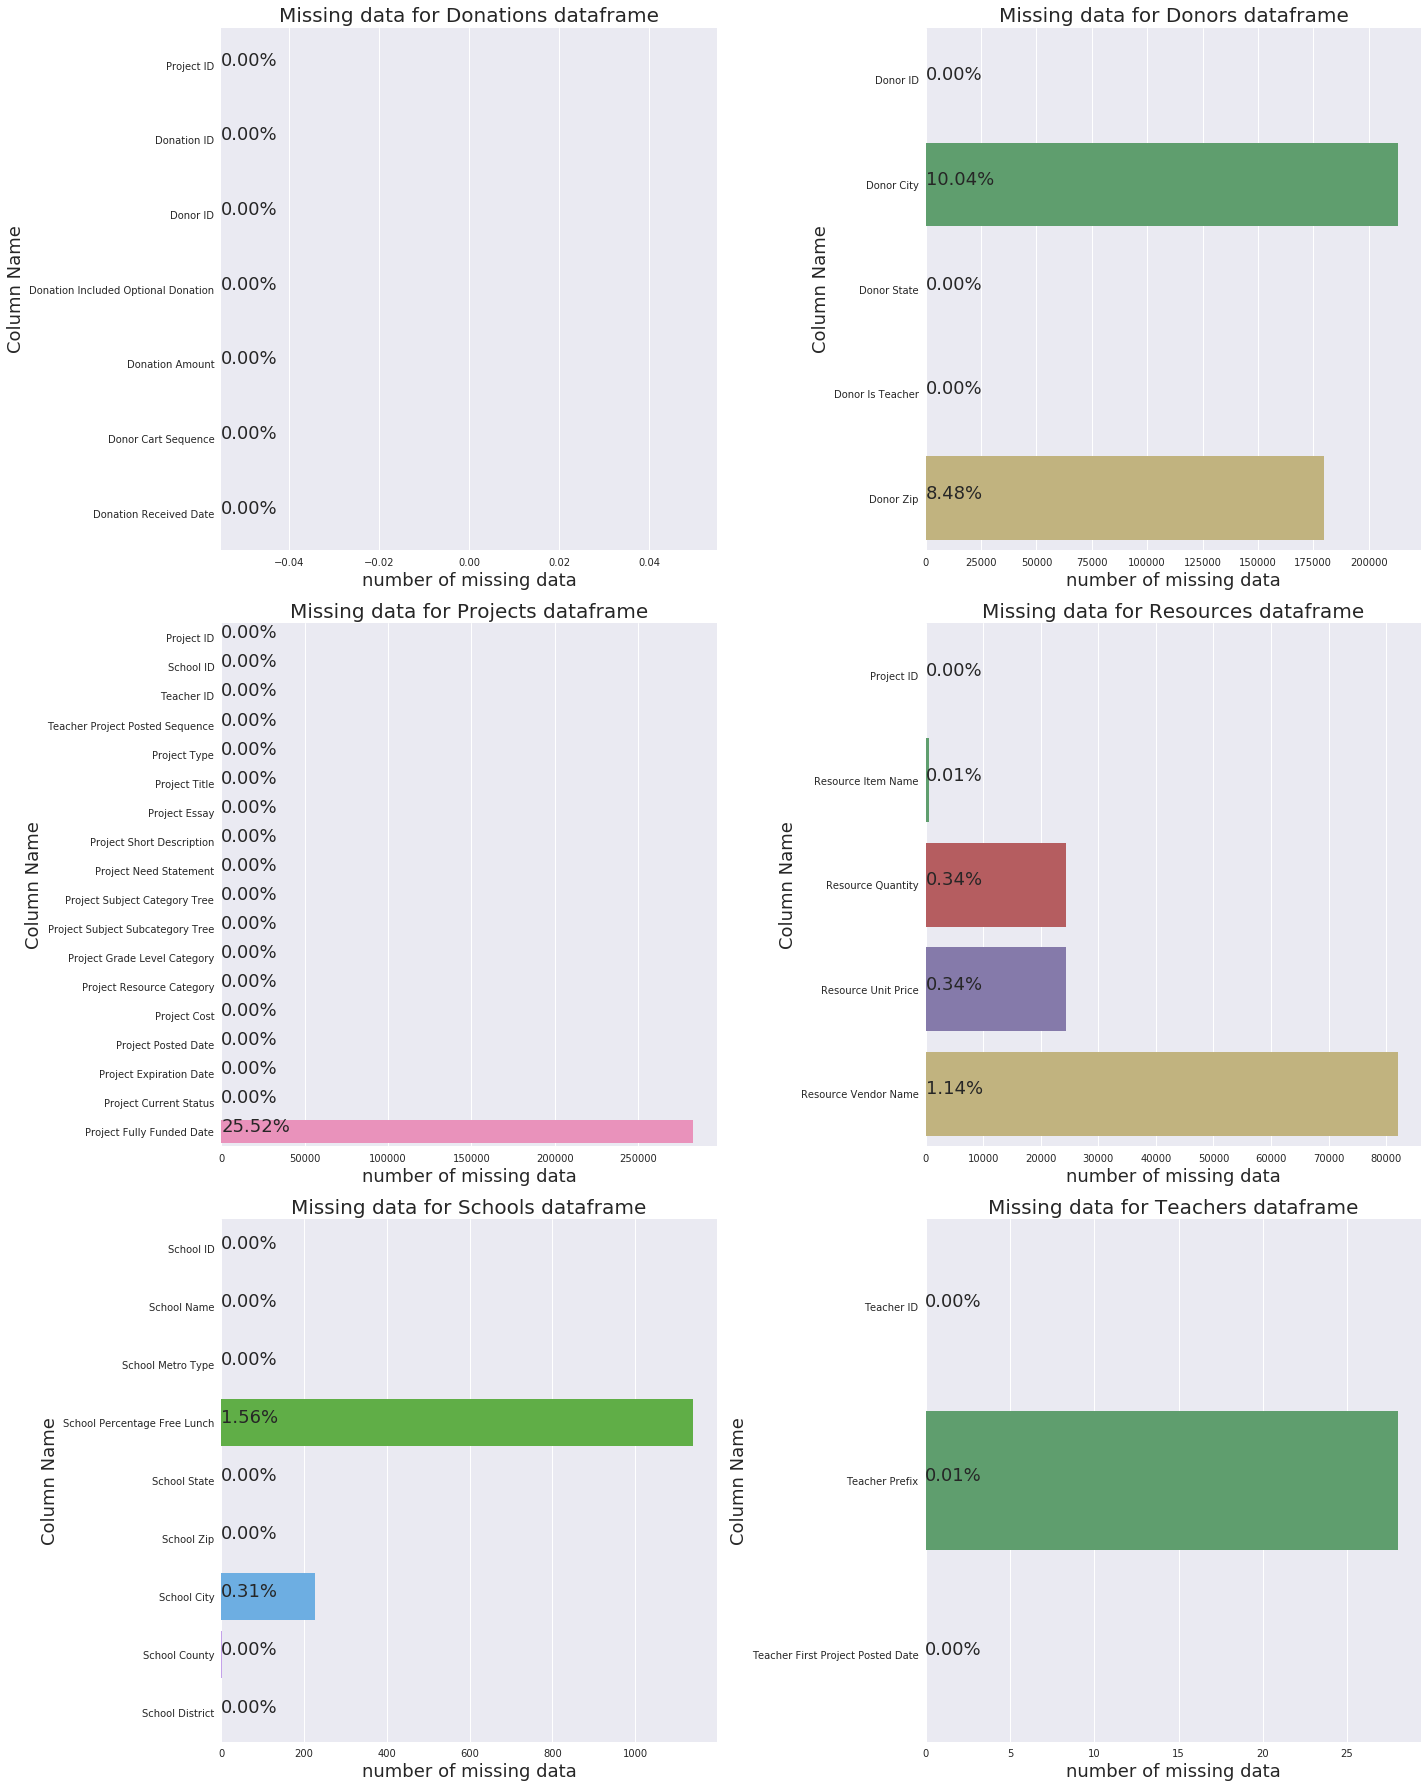

In [10]:
names = ['Donations','Donors','Projects','Resources','Schools','Teachers']
datum = [donations,donors,projects,resources,schools,teachers]
fig = plt.figure(figsize=(20,25))
for i,data in enumerate(datum):
    ax = fig.add_subplot(int(str(32)+str(i+1)))
    null_pct = data.isnull().sum()
    sns.barplot(null_pct.values,null_pct.index,ax = ax)

    for idx,value in enumerate(null_pct.values):
        ax.text(-0.055,idx,"{:.2f}%".format(float(value)/len(data)*100),fontsize=18)
    ax.set_xlabel("number of missing data",fontsize=18)
    ax.set_ylabel("Column Name",fontsize=18)
    ax.set_title("Missing data for {} dataframe".format(names[i]),fontsize=20)
    
plt.tight_layout()

Columns with missing data:  
* Donations: N/A
* Donors: Donor City, Donor Zip
* Projects: Project Fully Funded Date
* Resources: Resource Item Name, Resource Quantity, Resource Unit Price, Resource Vendor Name
* Schools: School Percentage Free Lunch, School City
* Teachers: Teacher Prefix

# <a id='3'>3. Basic Summary Statistics</a>

## <a id='31'>3.1. Donations</a>

Here we do some summary to all columns of **Donations** dataframe, except "Donation Received Date" column. We will analyze "Donation Received Date" columns in time series analysis section.

### <a id='311'>3.1.1. Donation Amounts</a>

Text(0,0.5,'')

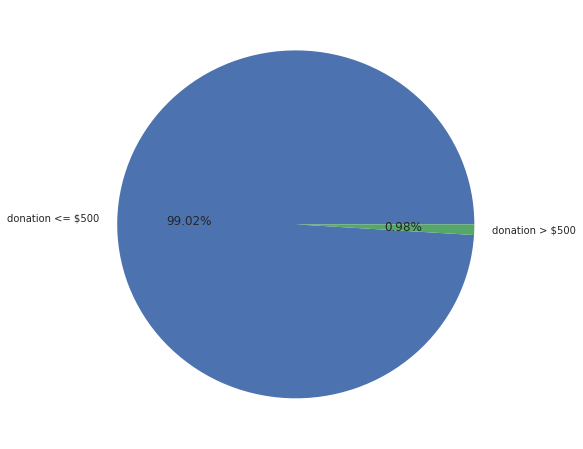

In [11]:
plt.figure(figsize=(8,8))
threshold = 500

temp = donations[["Donation Amount"]].dropna(inplace=False)
temp["large_amount"] = temp["Donation Amount"] > threshold
temp = temp.groupby(["large_amount"]).count().reset_index()
temp['Donation Amount'].plot(kind='pie',autopct="%.2f%%",labels=['donation <= ${}'.format(threshold),'donation > ${}'.format(threshold)])
plt.ylabel("")

It seems most of donations are less than 500 dollars. We focus on this range and see the distribution.

/homes/li2566/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of donation amounts')

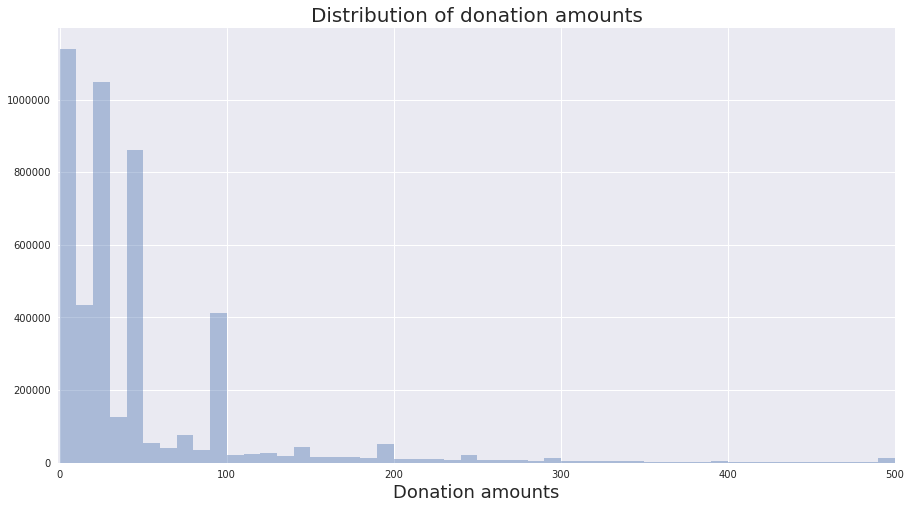

In [12]:
plt.figure(figsize=(15,8))
temp = donations[donations["Donation Amount"] <= threshold]['Donation Amount']
ax = sns.distplot(temp,bins=50,kde=False)
ax.set_xlim([-1,threshold])
plt.xlabel("Donation amounts",fontsize=18)
plt.title("Distribution of donation amounts",fontsize=20)

We learn most of donations are less than 10 dollars, then 20~30 dollars and 50~60 dollars.

### <a id='312'>3.1.2. Donation Included Optional Donation</a>

Text(0.5,1,'Donation Included Optional Donation')

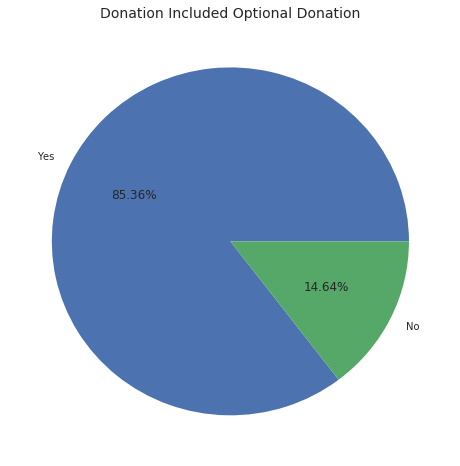

In [13]:
plt.figure(figsize=(8,8))
donation_optional = donations['Donation Included Optional Donation'].value_counts().reset_index()
donation_optional['Donation Included Optional Donation'].plot(kind='pie',autopct='%.2f%%',labels=['Yes','No'])
plt.ylabel("")
plt.title("Donation Included Optional Donation",fontsize=14)

Over 80% of donations include optional donation.

### <a id='313'>3.1.3. Donor Cart Sequence</a>

Text(0.5,1,'Top 20 Donor Cart Sequence')

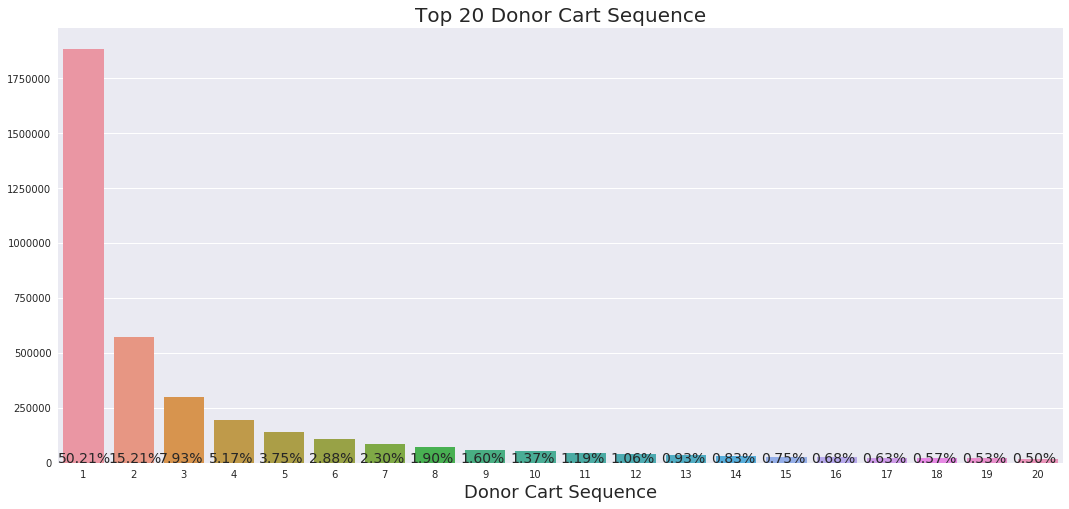

In [14]:
top = 20
plt.figure(figsize=(18,8))
donation_cart = donations['Donor Cart Sequence'].dropna().value_counts().reset_index()[:top]
sns.barplot(x='index',y='Donor Cart Sequence',data=donation_cart)
for i,v in enumerate(donation_cart['Donor Cart Sequence'].values):
    plt.text(i-0.5,0,"{:.2f}%".format(float(v)/donation_cart['Donor Cart Sequence'].values.sum()*100),fontsize=14)
#plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("Donor Cart Sequence",fontsize=18)
plt.title("Top {} Donor Cart Sequence".format(top),fontsize=20)

Donor Cart Sequence reflects the priority of desired donations for each donor. This graph pretty shows the common sense that people always first donate the project with the highest priority.

### <a id='314'>3.1.4. Donation ID</a>

In [15]:
print("Number of unique donations = {}".format(donations['Donation ID'].nunique()))
print("Number of donations = {}".format(len(donations)))

Number of unique donations = 4687844
Number of donations = 4687884


Although redundant, we checked each donation in data is unique.

### <a id='315'>3.1.5. Donor ID</a>

In [16]:
print("Number of unique donations = {}".format(donations['Donor ID'].nunique()))
print("Number of donations = {}".format(len(donations)))

Number of unique donations = 2024554
Number of donations = 4687884


There exist donors with multiple donations. Let's find the distribution of donation counts.

In [17]:
temp = donations['Donor ID'].value_counts()
print("Number of donors donating once only = {}".format(sum(temp==1)))
print("Number of donors donating more than 1000 times = {}".format(sum(temp > 1000)))

Number of donors donating once only = 1471613
Number of donors donating more than 1000 times = 123


The distribution is extremely unbalanced. While almost 70% of donors donated only once, there are more than 100 people who donate over 1000 times.

### <a id='316'>3.1.6. Project ID</a>

In [18]:
print("Number of unique projects = {}".format(donations['Project ID'].nunique()))
print("Number of projects recorded in Donations = {}".format(len(donations)))

Number of unique projects = 901965
Number of projects recorded in Donations = 4687884


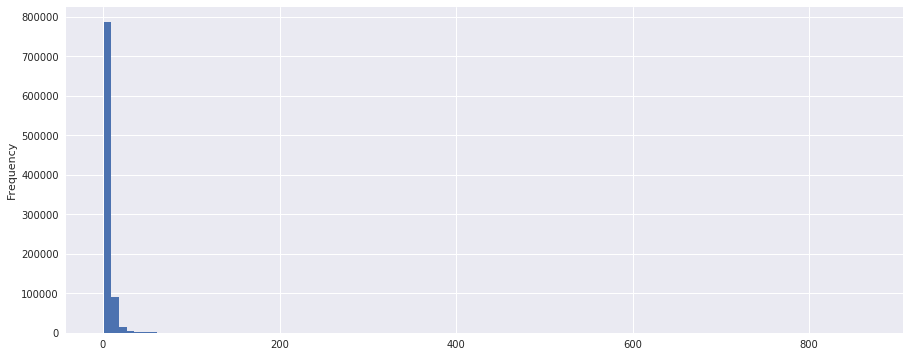

In [19]:
temp = donations['Project ID'].value_counts().sort_values()
plt.figure(figsize=(15,6))
temp.plot(kind='hist',bins=100)

The distribution of donations with multiple donations is also skewed. We will dig into it later.

## <a id='32'>3.2. Projects</a>

In this section we ignore columns like `"Project Posted Date"` or `"Project Essay"`, since they are either timestamps or text descriptions. We leave them to time series analysis or text analytics section.

### <a id='321'>3.2.1. Project ID</a>

In [20]:
print("Number of unique projects = {}".format(projects['Project ID'].nunique()))
print("Number of total projects in projects dataframe = {}".format(len(projects)))

Number of unique projects = 1110015
Number of total projects in projects dataframe = 1110017


Surprisingly, there are repeated projects. Let's dig more into it.

In [21]:
temp = projects['Project ID'].value_counts().sort_values(ascending=False)
ids = []
for i,v in enumerate(temp):
    if v > 1: ids.append(temp.index[i])
print(projects[projects['Project ID'].isin(ids)])

                               Project ID                         School ID  \
983393   99c07777fdcf63d3a0fdb4a0deb4b012  de69b6ee78c74d4356bf3302a649fb1e   
983535   99c07777fdcf63d3a0fdb4a0deb4b012  de69b6ee78c74d4356bf3302a649fb1e   
1041063  c940d0e78b7559573aca536db90c0646  5e1132a3628825b31f329a70fcec7030   
1041433  c940d0e78b7559573aca536db90c0646  5e1132a3628825b31f329a70fcec7030   

                               Teacher ID  Teacher Project Posted Sequence  \
983393   05f09b29bc8fd4f3cc10fc75eccbb573                               11   
983535   05f09b29bc8fd4f3cc10fc75eccbb573                               11   
1041063  69b63ccd52afd09ef3963b4cc3b15d00                                1   
1041433  69b63ccd52afd09ef3963b4cc3b15d00                                1   

                     Project Type  \
983393                Teacher-Led   
983535   Professional Development   
1041063               Teacher-Led   
1041433  Professional Development   

                           

The redundant projects differ at `"Project Type"` column only, we can choose one of them and mark the other as redundant.

In [22]:
redundant_ids = ["99c07777fdcf63d3a0fdb4a0deb4b012","c940d0e78b7559573aca536db90c0646"]
projects = projects[~(projects['Project ID'].isin(redundant_ids) & 
                      (projects['Project Type'] == 'Professional Development'))]

### <a id='322'>3.2.2. School ID</a>

In [23]:
print("Number of unique schools = {}".format(projects['School ID'].nunique()))
print("Number of projects = {}".format(len(projects)))

Number of unique schools = 72361
Number of projects = 1110015


In [24]:
temp = projects['School ID'].value_counts().sort_values()
print("Number of schools with only one project = {}".format(sum(temp==1)))
print("Number of schools with more than 250 projects = {}".format(sum(temp>250)))
print("Number of schools = {}".format(len(temp)))

Number of schools with only one project = 11736
Number of schools with more than 250 projects = 208
Number of schools = 72361


By peeking the data most of schools have less than 250 projects. let's focus them and see the distribution.

(0, 250)

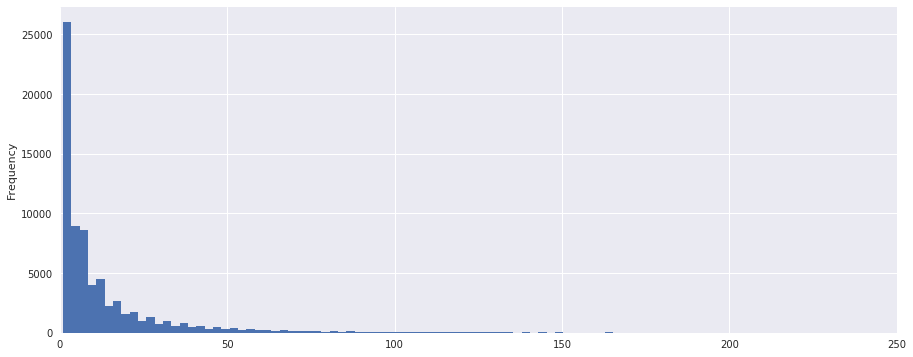

In [25]:
data = temp[temp <= 250]
plt.figure(figsize=(15,6))
data.plot(kind='hist',bins=100)
plt.xlim([0,250])

Again the distribution of number of projects schools own is like the exponential one.

### <a id='323'>3.2.3. Teacher ID</a>

In [26]:
print("Number of unique teachers = {}".format(projects['Teacher ID'].nunique()))
print("Number of projects = {}".format(len(projects)))

Number of unique teachers = 395706
Number of projects = 1110015


In [27]:
temp = projects['Teacher ID'].value_counts().sort_values(ascending=False)
print(temp.head())
print(temp.tail())

fa2f220b537e8653fb48878ebb38044d    320
1f64dcec848be8e95c4482cc845706b2    313
9d7051e2611cebdb758f1c7bd09360ac    253
19f24640d9da49f6f8b4c9938c049591    249
02bccf5c109ace4f3dcbce819a46daa1    243
Name: Teacher ID, dtype: int64
59b0420d01019caeb69091a59cc2bc03    1
e58da919f6739c0e2dc4a21293215403    1
f6ef4a183ec542fe8024c6307f5ed8a3    1
c726b4e663abbf55a6734d19782f85c0    1
54afe9410e4aa437e083e2e07de48293    1
Name: Teacher ID, dtype: int64


Number of teachers with only one project = 212446


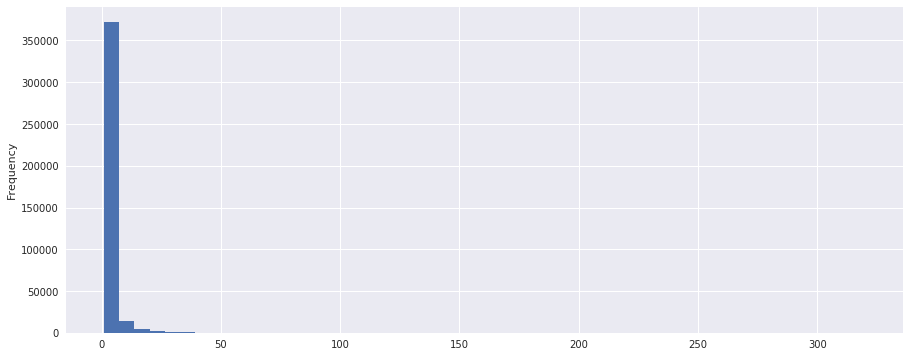

In [28]:
print("Number of teachers with only one project = {}".format(sum(temp==1)))
plt.figure(figsize=(15,6))
temp.plot(kind='hist',bins=50)

Over half of teachers have only one projects.

### <a id='324'>3.2.4. Teacher Project Posted Sequence</a>

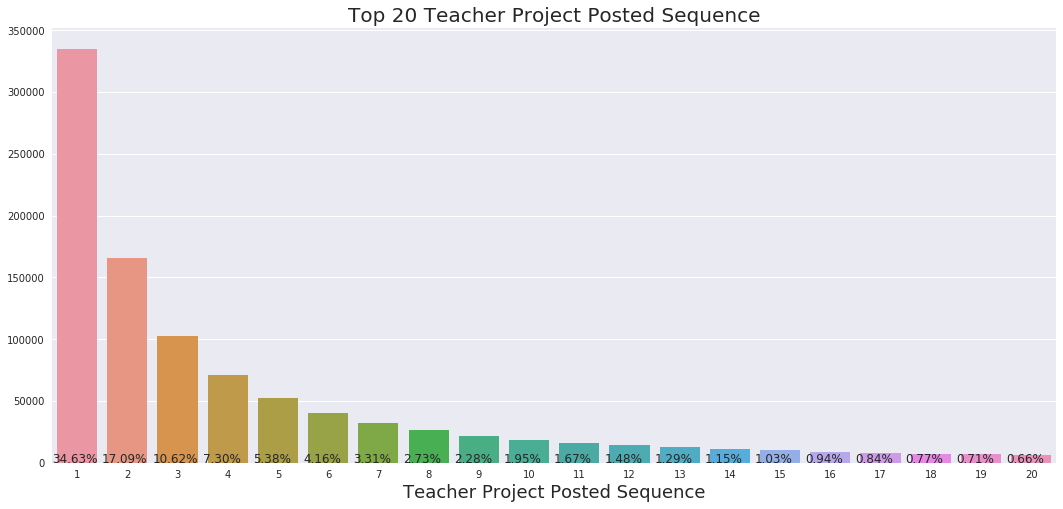

In [29]:
top = 20
temp = projects["Teacher Project Posted Sequence"].value_counts().sort_values(ascending=False)[:top]
plt.figure(figsize=(18,8))
sns.barplot(temp.index,temp.values)
plt.ylabel("")
plt.xlabel("Teacher Project Posted Sequence",fontsize=18)
plt.title("Top {} Teacher Project Posted Sequence".format(top),fontsize=20)
total = temp.sum()
for i,v in enumerate(temp):
    plt.text(i-0.5,0,"{:.2f}%".format(float(v)/total*100))

Since lack of description of "Teacher Project Posted Sequence", we don't know what it is. But we know the distribution is like exponential distribution.

### <a id='325'>3.2.5. Project Type</a>

Text(0.5,1,'Distribution of Project Types')

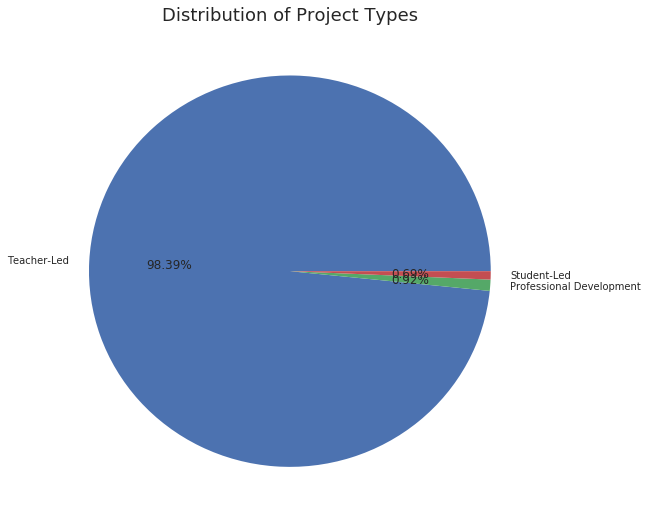

In [30]:
temp = projects["Project Type"].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(9,9))
temp['Project Type'].plot(kind='pie',autopct='%.2f%%',labels=temp['index'])
plt.ylabel("")
plt.xlabel("")
plt.title("Distribution of Project Types",fontsize=18)

Most of projects are led by teachers.

### <a id='326'>3.2.6. Project Subject Category Tree</a>

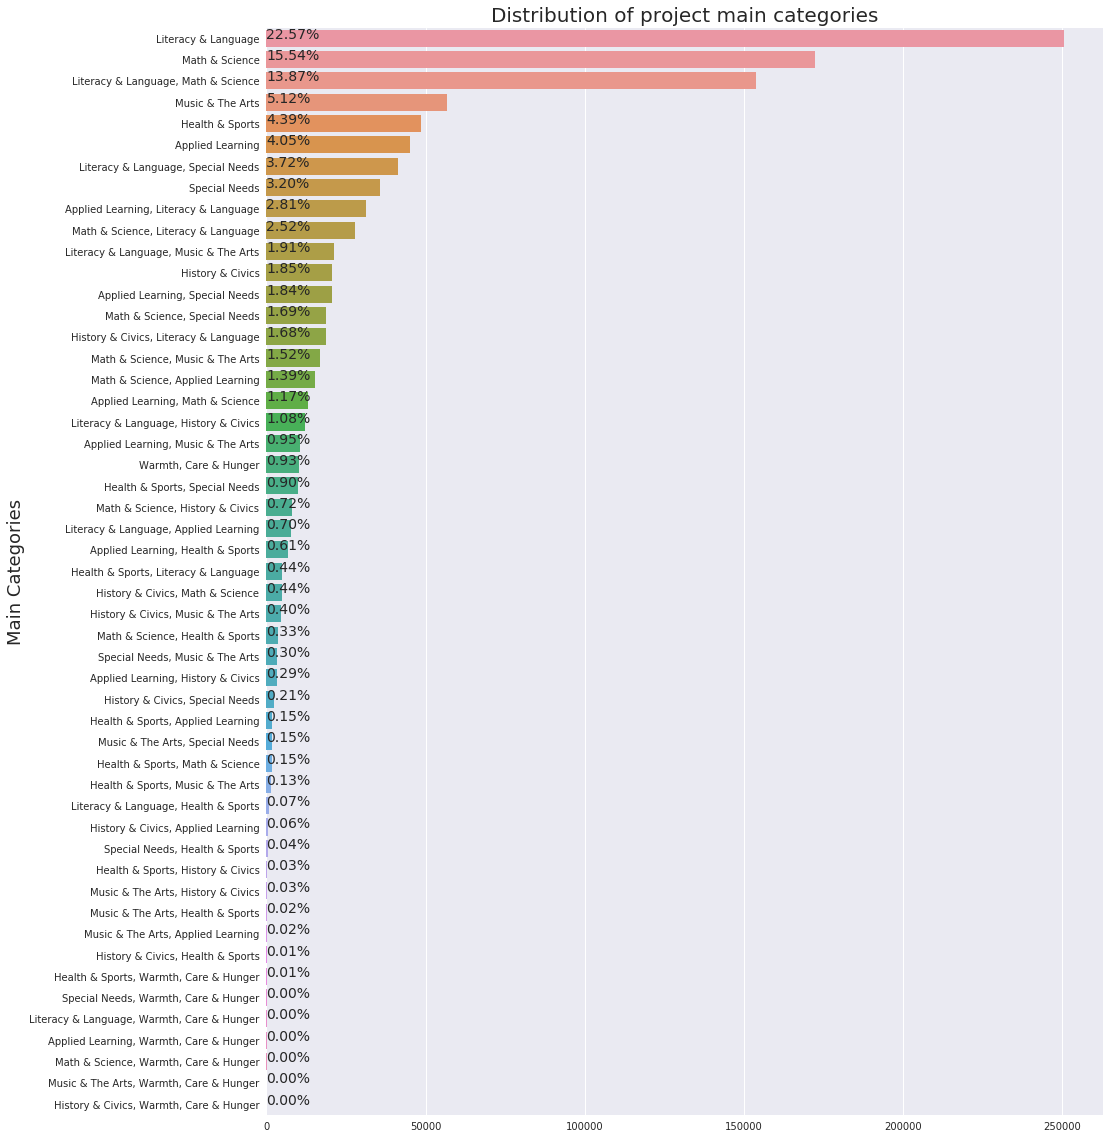

In [31]:
temp = projects['Project Subject Category Tree'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,20))
sns.barplot(x='Project Subject Category Tree',y='index',data=temp)
total = temp['Project Subject Category Tree'].sum()
plt.xlabel("")
plt.ylabel("Main Categories",fontsize=18)
plt.title("Distribution of project main categories",fontsize=20)
for i,v in enumerate(temp['Project Subject Category Tree']):
    plt.text(0,i,"{:.2f}%".format(float(v)/total*100),fontsize=14)

The top1 category is `"Literacy&Language"`, then `"Math&Science"` and `"Literacy&Language,Math&Science"`

### <a id='327'>3.2.7. Project Subject Subcategory Tree</a>

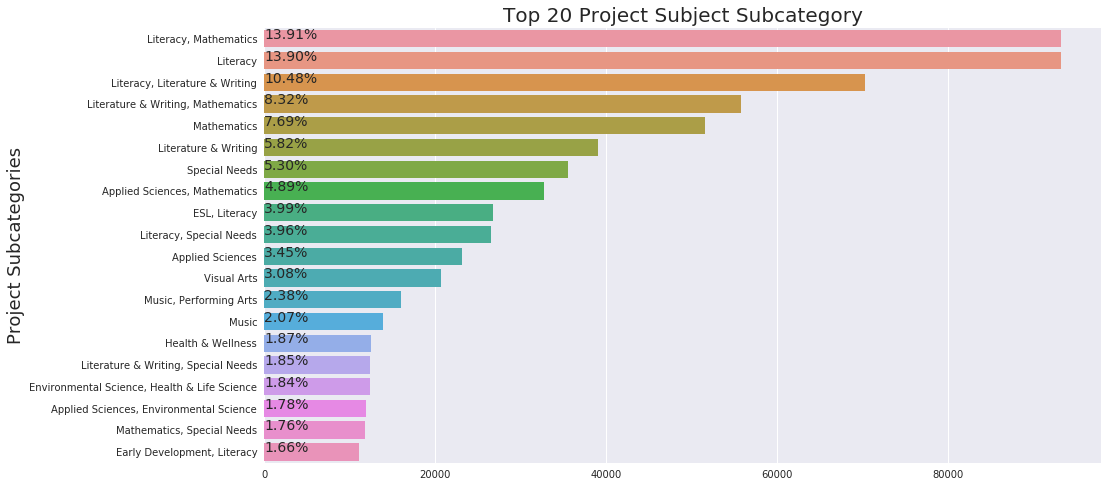

In [32]:
top = 20
temp = projects['Project Subject Subcategory Tree'].value_counts().sort_values(ascending=False).reset_index()[:top]
plt.figure(figsize=(15,8))
sns.barplot(x='Project Subject Subcategory Tree',y='index',data=temp)
total = temp['Project Subject Subcategory Tree'].sum()
plt.xlabel("")
plt.ylabel("Project Subcategories",fontsize=18)
plt.title("Top {} Project Subject Subcategory".format(top),fontsize=20)
for i,v in enumerate(temp['Project Subject Subcategory Tree']):
    plt.text(0,i,"{:.2f}%".format(float(v)/total*100),fontsize=14)

Since too many subcategories, we choose the top 20 and learn that subcategories about literacy and mathematics are popular ones, which matches the statistics of the above result. Popular subcategories are topics about `"Literacy"`, `"Mathematics"` and `"Literature"`.

### <a id='328'>3.2.8. Project Grade Level Category</a>

Text(0,0.5,'')

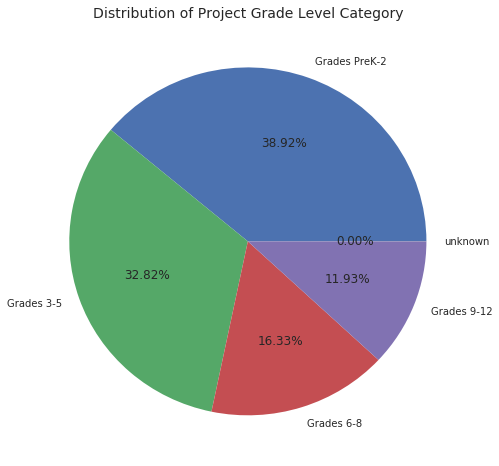

In [33]:
temp = projects['Project Grade Level Category'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,8))
temp['Project Grade Level Category'].plot(kind='pie',autopct='%.2f%%',labels=temp['index'])
plt.title("Distribution of Project Grade Level Category",fontsize=14)
plt.ylabel("")

We learn most of projects focus on serving children under Grades 5.

### <a id='329'>3.2.9. Project Resource Category</a>

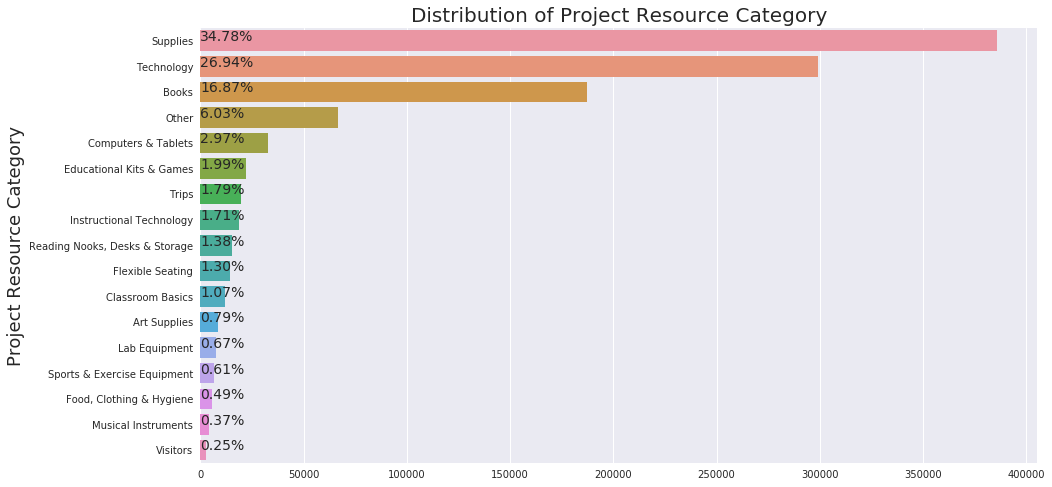

In [34]:
temp = projects['Project Resource Category'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x='Project Resource Category',y='index',data=temp)
total = temp['Project Resource Category'].sum()
plt.xlabel("")
plt.ylabel("Project Resource Category",fontsize=18)
plt.title("Distribution of Project Resource Category",fontsize=20)
for i,v in enumerate(temp['Project Resource Category']):
    plt.text(0,i,"{:.2f}%".format(float(v)/total*100),fontsize=14)

The most popular requested resources are `"Supplies"`, `"Technology"` and `"Books"`.

### <a id='3210'>3.2.10. Project Cost</a>

/homes/li2566/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of project costs')

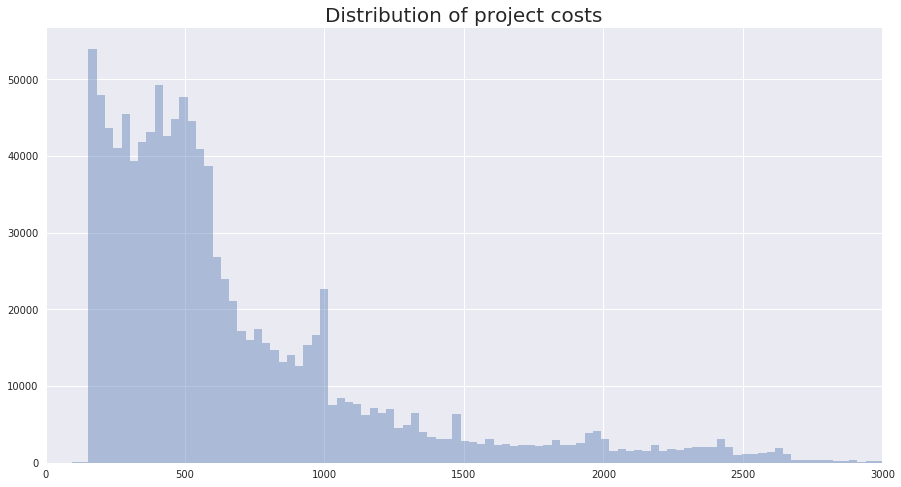

In [35]:
threshold = 3000
temp = projects[['Project Cost']]
plt.figure(figsize=(15,8))
sns.distplot(temp[temp['Project Cost'] < threshold],bins=100,kde=False)
plt.xlim([0,3001])
plt.title("Distribution of project costs",fontsize=20)

We learn most of costs are under $600.

### <a id='3211'>3.2.11. Project Current Status</a>

Text(0.5,1,'Distribution of Project Current Status')

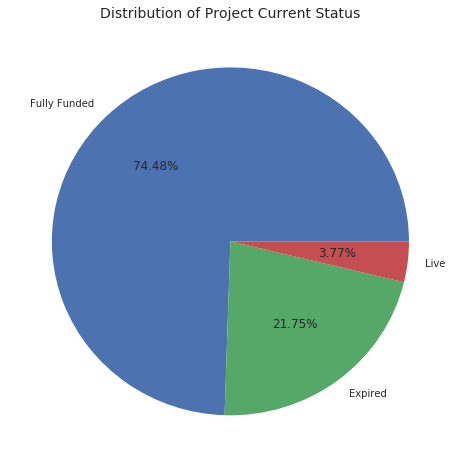

In [36]:
temp = projects['Project Current Status'].value_counts().sort_values(ascending=False).reset_index()[:20]
plt.figure(figsize=(8,8))
temp['Project Current Status'].plot(kind='pie',autopct='%.2f%%',labels=temp['index'])
plt.xlabel("")
plt.ylabel("")
plt.title("Distribution of Project Current Status",fontsize=14)

Almost 3 quarters of projects are fully funded and a fifth are expired.

## <a id='33'>3.3. Donors</a>

We ignore `"Donor Zip"` here since zipcode depends only on cities and states.

### <a id='331'>3.3.1. Donor ID</a>

In [37]:
print("Number of unique donors = {}".format(donors['Donor ID'].nunique()))
print("Number of donors = {}".format(len(donors)))

Number of unique donors = 2122640
Number of donors = 2122640


Every donor in the dataframe is unique, which means the data has no redundant rows.

### <a id='332'>3.3.2. Donor Distribution Among States</a>

In [38]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'District of Columbia': 'DC',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
donors_state = donors['Donor State'].value_counts().drop('other',axis=0)
data = [dict(
        type = "choropleth",
        #locations = donors_state.index.str,
        locations = donors_state.index.map(lambda x: us_state_abbrev[x]),
        locationmode = 'USA-states',
        z = donors_state.values,
        #text = donors_state.index,
        colorscale = 'Red',
        marker = dict(line=dict(width=0.7)),
        colorbar = dict(title='Number of Donors')
    )]
layout = dict(
        title = 'Number of Donor Distribution Among States',
        geo = dict(
            scope='usa',
            showframe = False,
            showcoastlines = True,
            projection=dict( type='albers usa' ),
        )
    )
fig = dict(data=data, layout=layout)
offline.iplot(fig)

Text(0,0.5,'')

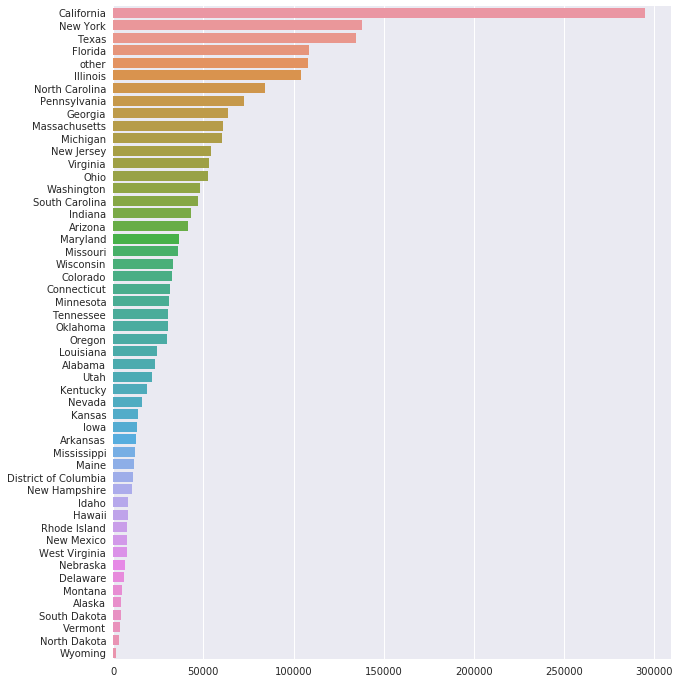

In [39]:
temp = donors['Donor State'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,12))
sns.barplot(y='index',x='Donor State',data=temp)
plt.xlabel("")
plt.ylabel("")

The top 3 state with most number of donations are `"California"`, `"New York"` and `"Texas"`.

### <a id='333'>3.3.3. Donor Is Teacher</a>

Text(0.5,1,'Donor Is Teacher')

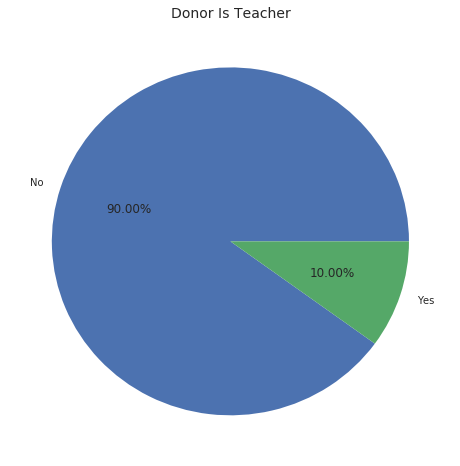

In [40]:
donor_teacher = donors['Donor Is Teacher'].value_counts().reset_index()
plt.figure(figsize=(8,8))
donor_teacher['Donor Is Teacher'].plot(kind='pie',autopct='%.2f%%',labels=donor_teacher['index'])
plt.xlabel("")
plt.ylabel("")
plt.title("Donor Is Teacher",fontsize=14)

Only 10% of donors are teachers.

### <a id='334'>3.3.4. Top 100 Donor Distribution Among Cities</a>

In [41]:
donors_location = donors[donors['Donor State'] != 'other'][['Donor City','Donor State']]
donors_location = donors_location.loc[~donors_location['Donor City'].isnull(),]
donors_city = donors_location['Donor City'].astype(str) + ', ' + donors_location['Donor State'].astype(str)
donors_city = donors_city.value_counts().sort_values(ascending=False)[:100].to_frame()
donors_city.columns = ['Count']

In [42]:
# Get the location of each city and plot it
#geolocator = Nominatim()
#for city in donors_city.index:
#    loc = geolocator.geocode(city)
#    if loc:
#        donors_city.loc[city,'lon'] = loc.longitude
#        donors_city.loc[city,'lat'] = loc.latitude
#        time.sleep(1) # we cannot query geolocator too frequently

# we load the longitude and latitude of cities directly, which comes from the above commented codes
donors_city['lon'] = [ 
    -87.6244212,   -73.9866136,   -73.9495823,   -84.11721147,  -73.3676149,
    -95.3676974,  -122.3300624,   -75.1635755,   -84.3901849,  -122.6741949,
    -86.1583502,   -97.7436995,   -80.8431268,   -77.0366456,   -80.1936589,
    -117.1627714,  -112.0773456,   -93.2654692,  -104.984696,    -96.7968559,
    -84.0665224,   -97.5103397,   -90.1978889,  -122.2713563,   -98.4951405,
    -115.149225,    -82.458444,    -79.9900861,   -85.759407,    -81.3794368,
    -78.6390989,   -93.1015026,   -76.610759,    -87.922497,    -71.0595678,
    -121.4943996,   -81.655651,    -83.0007065,   -84.5124602,   -74.1496048,
    -73.83669616,  -97.3327459,   -80.1433786,   -90.0516285,   -94.5630298,
    -77.43428,     -78.9018115,  -111.9783931,  -119.0194639,  -110.9262353,
    -86.7743531,   -77.09024765,  -81.6934446,   -89.3837613,   -77.0841585,
    -118.15804932,  -95.9929113,   -89.97500545, -106.6509851,   -86.8024326,
    -82.3984882,   -95.2621553,  -122.2728639,  -114.9819235,   -79.9402728,
    -79.7919754,   -94.63275393,  -78.7811925,   -95.8243956,  -117.8259819,
    -80.2440518,  -121.9885719,   -75.9774183,   -81.0998342,   -85.6678639,
    -95.4172549,  -105.0166498,   -81.0343313,  -111.58606618,  -95.9378732,
    -111.8992365,   -80.0533746,   -84.5496148,  -122.064963,    -78.8783922,
    -80.1247667,  -118.0000166,  -104.8253485,   -91.154551,    -84.2747329,
    -80.1494901,   -83.9210261,  -117.1884542,   -84.1916069,  -121.8746789,
    -84.4970393,  -121.9999606,  -149.8948523,  -118.3406288,  -122.4886034 ]
donors_city['lat'] = [
    41.8755546,  40.7306458,  40.6501038,   9.9970987,   8.6545394,  29.7589382,
    47.6038321,  39.9524152,  33.7490987,  45.5202471,  39.7683331,  30.2711286,
    35.2270869,  38.8949549,  25.7742658,  32.7174209,  33.4485866,  44.9772995,
    39.7391428,  32.7762719,   9.9327612,  35.5377266,  38.6272733,  37.8044557,
    29.4246002,  36.1662859,  27.9477595,  40.4416941,  38.2542376,  28.5423999,
    35.7803977,  44.9504037,  39.2908816,  43.0349931,  42.3604823,  38.5815719,
    30.3321838,  39.9622601,  39.1014537,  40.5834557,  40.85703325, 32.753177,
    26.1223084,  35.1490215,  39.0844687,  37.5385087,  35.9966551,  40.7879394,
    35.3738712,  32.2218917,  36.1622296,  38.8147596,  41.5051613,  43.074761,
    38.8903961,  33.78538945, 36.1556805,  30.03280175, 35.0841034,  33.5206824,
    34.851354,   29.9988312,  37.8708393,  36.0391456,  32.7876012,  36.0726355,
    38.99134745, 35.7882973,  29.7857853,  33.6856969,  36.0998131,  37.5482697,
    36.8529841,  32.0835407,  42.9632405,  30.0798826,  39.613321,   34.0007493,
    33.436188,   41.2587317,  33.5091215,  26.7153425,  33.9528472,  37.9063131,
    42.8867166,  26.2378597,  33.6783336,  38.8339578,  30.4507462,  34.0709576,
    26.0112014,  35.9603948,  33.5777524,  39.7589478,  37.6624312,  38.0464066,
    37.8215929,  61.2163129,  33.8358492,  37.5053381 ]

In [43]:
text = donors_city.index.astype(str) + ', Number of donors: ' + donors_city.Count.astype(str)
data = [dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = donors_city.lon,
        lat = donors_city.lat,
        text = text,
        mode = 'markers',
        marker = dict(
            size = donors_city.Count.div(1000),
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            #symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            cmin = 0,
            color = donors_city.Count,
            cmax = max(donors_city.Count),
            colorbar=dict(
                title="Number of Donors"
            )
        ))]

layout = dict(
        title = 'Distribution of Donors Across Cities',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict(data=data, layout=layout)
offline.iplot(fig)

From the above graph it is clear that `"Chicago"`, `"New York"` and `"Brooklyn"` are the top 3 cities with largest number of donations.

## <a id='34'>3.4. Resources</a>

### <a id='341'>3.4.1. Project ID</a>

In [44]:
print("Number of unique projects in resources = {}".format(resources['Project ID'].nunique()))
print("Number of resource records = {}".format(len(resources)))

Number of unique projects in resources = 1208649
Number of resource records = 7210448


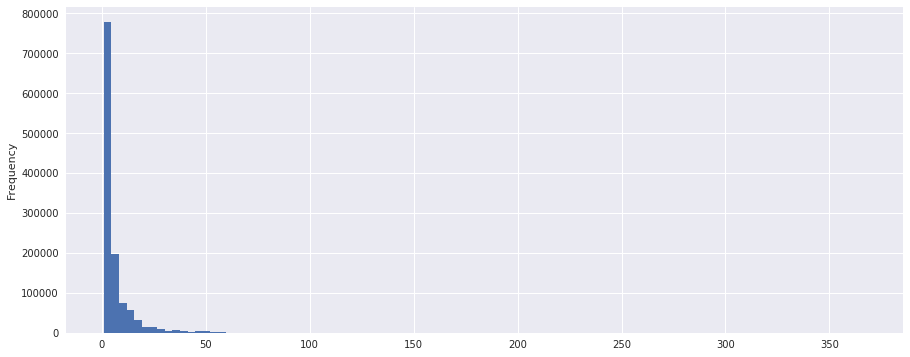

In [45]:
temp = resources['Project ID'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,6))
temp.plot(kind='hist',bins=100)

Most of projects have less than 10 resource records.

### <a id='342'>3.4.2. Resource Item Costs</a>

Instead of focusing on `"Resource Quantity"` and `"Resource Unit Price"`, we focus on the total prices for each record.

In [46]:
temp = resources[~resources['Resource Quantity'].isnull() & ~resources['Resource Unit Price'].isnull()][['Resource Quantity','Resource Unit Price']]
temp['Resource Quantity'] = temp['Resource Quantity'].astype(float)
temp['Resource Unit Price'] = temp['Resource Unit Price'].astype(float)
temp['total_cost'] = temp['Resource Quantity'].mul(temp['Resource Unit Price'])

# 
threshold = 1000
print("Number of resources is {}".format(len(temp)))
print("Number of resources greater than {} is {}".format(threshold,(temp['total_cost'] > threshold).sum()))

Number of resources is 7186136
Number of resources greater than 1000 is 81452


We know most of resource costs are less than \$1000. we then only focus on those whose costs are less than \$1000.

/homes/li2566/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of Resource Item Costs')

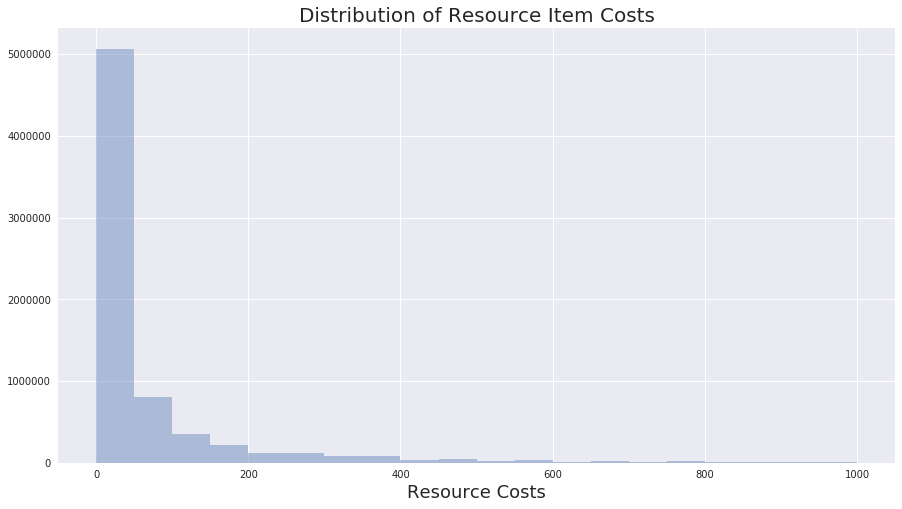

In [47]:
temp = temp[temp['total_cost'] <= 1000]
plt.figure(figsize=(15,8))
sns.distplot(temp['total_cost'],bins=20,kde=False)
plt.xlabel("Resource Costs",fontsize=18)
plt.title("Distribution of Resource Item Costs",fontsize=20)

Most of resource item costs are less than \$100.

### <a id='343'>3.4.3. Top Resource Vendors</a>

/homes/li2566/.local/lib/python2.7/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/homes/li2566/.local/lib/python2.7/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



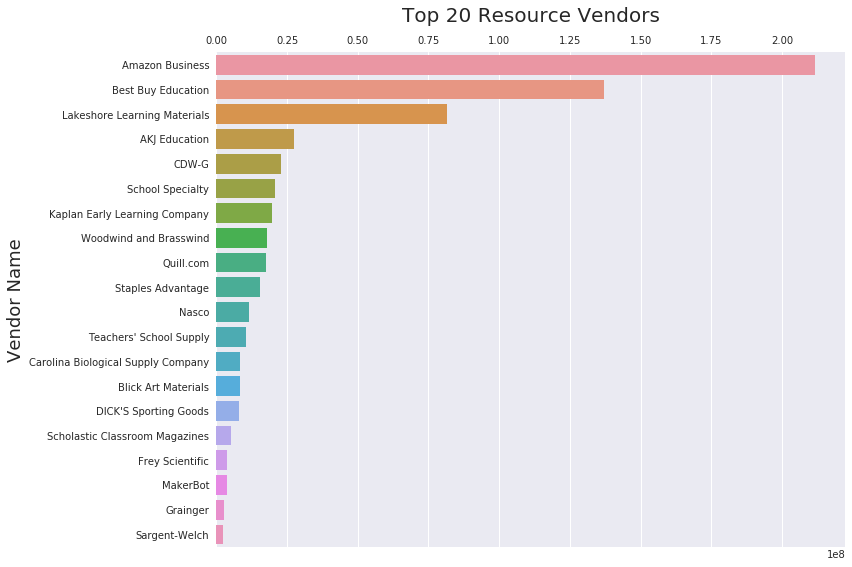

In [48]:
top = 20
temp = resources[~resources['Resource Vendor Name'].isnull()]
temp.loc[:,'total_costs'] = temp.loc[:,'Resource Quantity'].mul(temp.loc[:,'Resource Unit Price'])
data = temp.groupby('Resource Vendor Name')['total_costs'].sum().sort_values(ascending=False)[:20].reset_index()
plt.figure(figsize=(12,8))
ax = sns.barplot(y='Resource Vendor Name',x='total_costs',data=data)
plt.title("Top {} Resource Vendors".format(top),fontsize=20,y=1.05)
plt.ylabel("Vendor Name",fontsize=18)
plt.xlabel("")
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
plt.tight_layout()

The top 3 popular vendors are `"Amazon"`, `"Best Buy"` and `"Lakeshore Learning"`.

## <a id='35'>3.5. School</a>

Here we ignore `"School Name"`, `"School Zip"`, `"School County"`, `"School District"`, `"School City"` and do summaries to rest of features, since we want the rough information about the location of schools now.

### <a id='351'>3.5.1. School ID</a>

In [49]:
print("Number of unique schools = {}".format(schools['School ID'].nunique()))
print("Size of School dataframe = {}".format(len(schools)))

Number of unique schools = 72993
Size of School dataframe = 72993


`"School"` dataframe has no redundant entries.

### <a id='352'>3.5.2. School Metro Type</a>

Text(0,0.5,'')

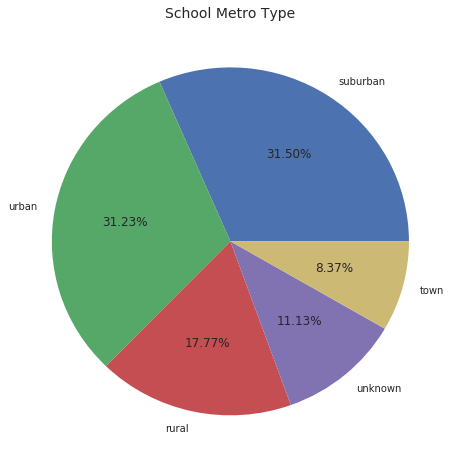

In [50]:
school_type = schools['School Metro Type'].value_counts().reset_index()
plt.figure(figsize=(8,8))
school_type['School Metro Type'].plot(kind='pie',autopct='%.2f%%',labels=school_type['index'])
plt.title("School Metro Type",fontsize=14)
plt.xlabel("")
plt.ylabel("")

Schools from suburban and urban area account for almost 2 thirds of donations.

### <a id='353'>3.5.3. School Percentage Free Lunch</a>

/homes/li2566/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,0,'')

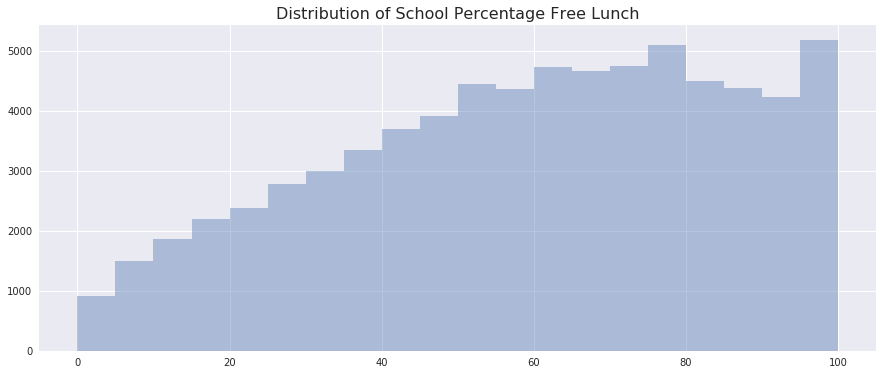

In [51]:
plt.figure(figsize=(15,6))
sns.distplot(schools["School Percentage Free Lunch"].dropna(),bins=20,kde=False)
plt.title("Distribution of School Percentage Free Lunch",fontsize=16)
plt.xlabel("")

It seems that free lunch are widespread in over half of schools.

### <a id='354'>3.5.4. School Locations Distribution Among States</a>

In [52]:
school_state = schools['School State'].dropna().value_counts()
data = [dict(
        type = "choropleth",
        #locations = donors_state.index.str,
        locations = school_state.index.map(lambda x: us_state_abbrev[x]),
        locationmode = 'USA-states',
        z = school_state.values,
        colorscale = 'Blue',
        marker = dict(line=dict(width=0.7)),
        colorbar = dict(title='Number of Schools')
    )]
layout = dict(
        title = 'Number of Schools Among States',
        geo = dict(
            scope='usa',
            showframe = False,
            showcoastlines = True,
            projection=dict( type='albers usa' ),
        )
    )
fig = dict(data=data, layout=layout)
offline.iplot(fig)

`"California"`, `"Texas"` and `"New York"` are top 3 states that have the largest number of schools recorded.

## <a id='36'>3.6. Teachers</a>

We ignore `"Teacher First Posted Project Date"` column and leave it to the time series analysis section.

### <a id='361'>3.6.1. Teacher ID</a>

In [53]:
print("Number of unique teacher ID = {}".format(teachers['Teacher ID'].nunique()))
print("Size of Teacher dataframe = {}".format(len(teachers)))

Number of unique teacher ID = 402900
Size of Teacher dataframe = 402900


`"Teacher"` dataframe also has no redundant rows.

### <a id='362'>3.6.2. Teacher Prefix</a>

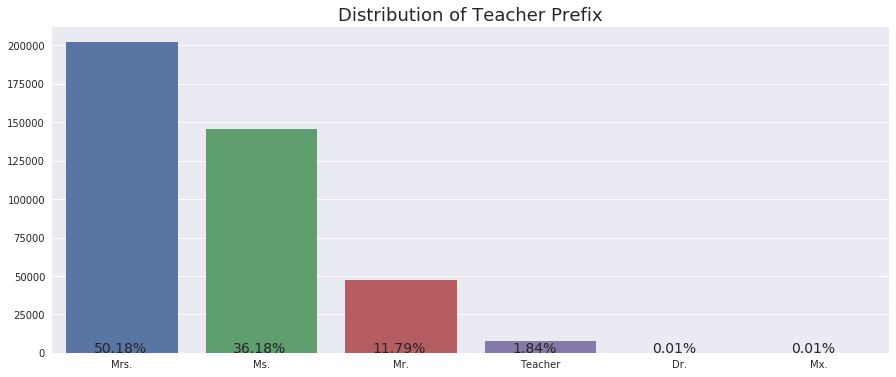

In [54]:
teacher_gender = teachers['Teacher Prefix'].dropna().value_counts().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(x='index',y='Teacher Prefix',data=teacher_gender)
plt.xlabel("")
plt.ylabel("")
total = teacher_gender['Teacher Prefix'].sum()
plt.title("Distribution of Teacher Prefix",fontsize=18)
for i,v in enumerate(teacher_gender['Teacher Prefix']):
    plt.text(i-0.2,0,"{:.2f}%".format(float(v)/total*100),fontsize=14)

It seems most of teachers are females.

## <a id='37'>3.7. Summary</a>

Except for `"Projects"` dataframe, other dataframes have no redundant data.

# <a id='4'>4. In-Depth Exploratory Data Analysis</a>

In this part we will ask some interesting questions and try to answer them with our analysis.

## <a id='41'>4.1. Donation Amounts vs. Project Cost</a>

It is common that the funding comes not only from donations but also from other sources. Here we are going to explore this. To make things easier we only focus on fully-funded projects.

In [55]:
simplified_donation = donations[['Donation Amount','Project ID']].groupby("Project ID").sum().reset_index()
merged = projects.merge(simplified_donation,
                       how='inner',
                       on='Project ID')
merged['Donation Amount'] = merged['Donation Amount'].astype(float)
merged['funding_gap'] = merged['Project Cost'].subtract(merged['Donation Amount'])
merged.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date,Donation Amount,funding_gap
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11,230.50,131.30
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN,29.00,483.85
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22,426.21,9.71
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06,161.26,0.00
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01,195.56,68.63


We learn that there are many projects having gaps between project costs and total donations. For convenience we call it funding gap. The reason of these gaps is unknown, we can only assume these come from other funding sources.

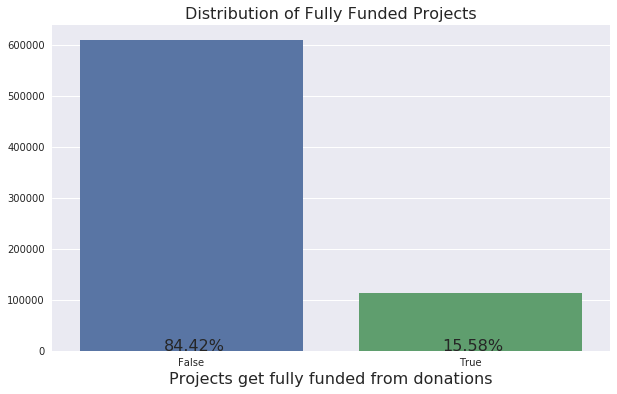

In [56]:
temp = merged[merged['Project Current Status'] == 'Fully Funded'][['Project Current Status','funding_gap']]
temp['well_funded'] = (temp['funding_gap'] <= 0)
counts = temp['well_funded'].value_counts().reset_index()
total = counts['well_funded'].sum()
plt.figure(figsize=(10,6))
sns.barplot(x='index',y='well_funded',data=counts)
plt.xlabel("Projects get fully funded from donations",fontsize=16)
plt.ylabel("")
plt.title("Distribution of Fully Funded Projects",fontsize=16)
for i,v in enumerate(counts['well_funded']):
    plt.text(i-0.1,0,"{:.2f}%".format(float(v)/total*100),fontsize=16)

Over 80% of projects that claim fully-fundedness have funding gaps. Now plot the distribution of funding gaps.

/homes/li2566/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of funding gaps between 0 and 1000')

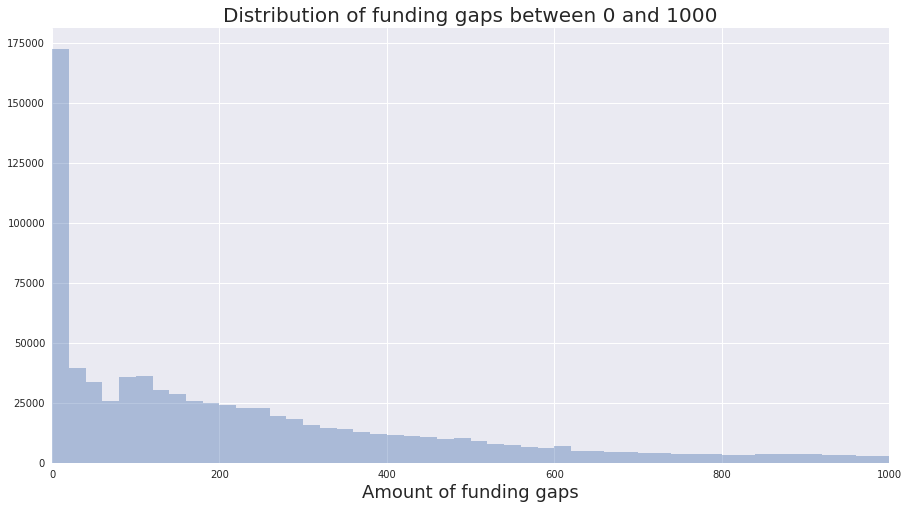

In [57]:
lb,ub = 0,1000
temp = merged[(lb <= merged['funding_gap']) & (merged['funding_gap'] < ub)]['funding_gap']
plt.figure(figsize=(15,8))
sns.distplot(temp,bins = 50,kde=False)
plt.xlim([0,1000])
plt.xlabel("Amount of funding gaps",fontsize=18)
plt.title("Distribution of funding gaps between {} and {}".format(lb,ub),fontsize=20)

Here's the summary:
* Most of projects have gaps between total donation amounts and project costs, even though these projects are marked as fully-funded.
* Most of gaps are less than \$20.

## <a id='42'>4.2. Project Costs vs. Resource Costs</a>

Here we compare project costs and resource costs spent on projects. If we assume the goal of donations is to buy necessary resources that the project claims, then we expect them to be equal. So let's check it out.

In [58]:
simplified_src = resources[['Project ID','Resource Quantity','Resource Unit Price']]
simplified_src.loc[:,'resource_prices'] = simplified_src['Resource Quantity'].mul(simplified_src['Resource Unit Price'])
simplified_src = simplified_src[['Project ID','resource_prices']].groupby('Project ID').sum().reset_index()
merged = projects.merge(simplified_src,
                       how = 'inner',
                       on = 'Project ID')
merged['excess_cost'] = merged['Project Cost'].subtract(merged['resource_prices'])
merged['have_excess_cost'] = (merged['excess_cost'] > 0)

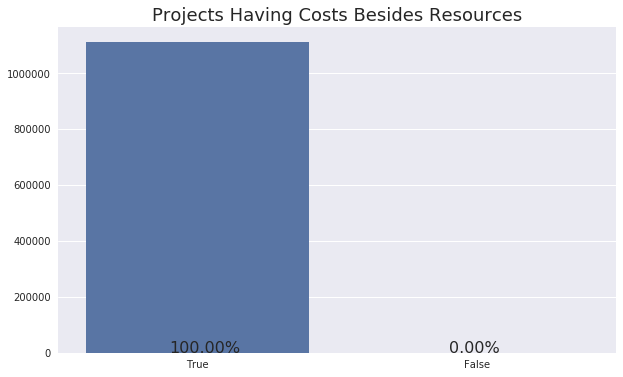

In [59]:
temp = merged['have_excess_cost'].value_counts().reset_index()
total = temp['have_excess_cost'].sum()
plt.figure(figsize=(10,6))
sns.barplot(x='index',y='have_excess_cost',data=temp,order=[True,False])
plt.title("Projects Having Costs Besides Resources",fontsize=18)
plt.xlabel("")
plt.ylabel("")
for i,v in enumerate(temp['have_excess_cost']):
    plt.text(i-0.1,0,"{:.2f}%".format(float(v)/total*100),fontsize=16)

Summary: Almost all projects have excess costs except for resource costs. Again, we don't know what these excess costs are for.

## <a id='43'>4.3. Donation Amounts vs. Donation Included Optional Donation</a>

**Donation Included Optional Donation** means donors agrees to spare portion of donations to DonorsChoose.org. Here we investigate the distribution of such options.

Text(0.5,1,'Mean')

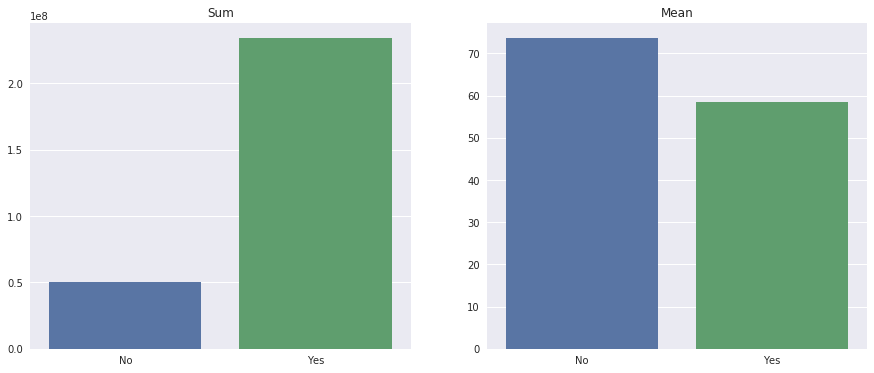

In [60]:
data = donations.groupby('Donation Included Optional Donation')['Donation Amount'].agg(['sum','mean']).reset_index()
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot("121")
sns.barplot(x='Donation Included Optional Donation',y='sum',data=data,ax=ax1)
ax1.set_ylabel("")
ax1.set_xlabel("")
ax1.set_title("Sum")
ax2 = fig.add_subplot("122")
sns.barplot(x='Donation Included Optional Donation',y='mean',data=data,ax=ax2)
ax2.set_ylabel("")
ax2.set_xlabel("")
ax2.set_title("Mean")

The above graphs indicates donations with this option come more from small-amount donations than large-amount ones.  

Now here is an interesting question: what is the distribution of such donors?

In [61]:
donation_donor = donations.merge(donors,how='inner',on='Donor ID')

Text(0,0.5,'')

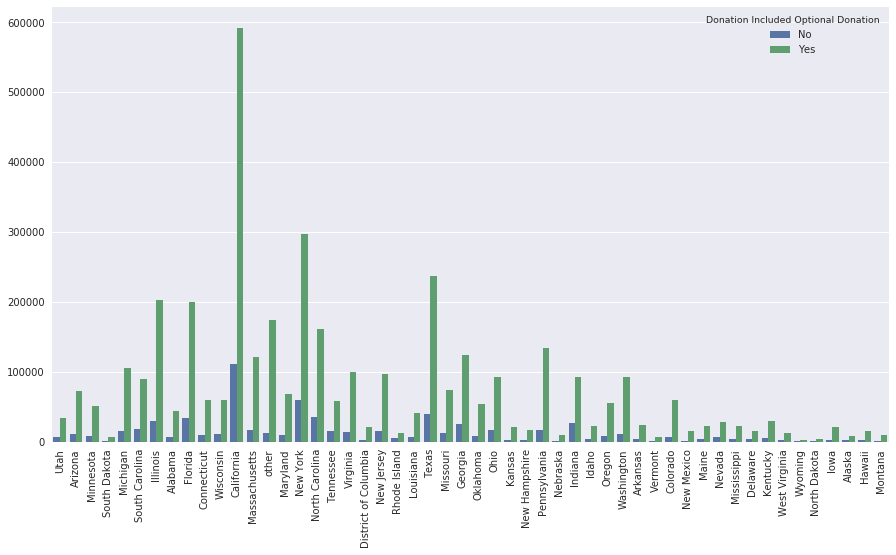

In [62]:
fig = plt.figure(figsize = (15,8))
sns.countplot(x='Donor State',hue='Donation Included Optional Donation',data=donation_donor)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")

The distribution of donors seems to follow the overall distribution of donors. But wait! Notice that a donor can make multiple donations, and we have to include such fact befor making the conclusion. Now let's go over it again.

Text(0,0.5,'')

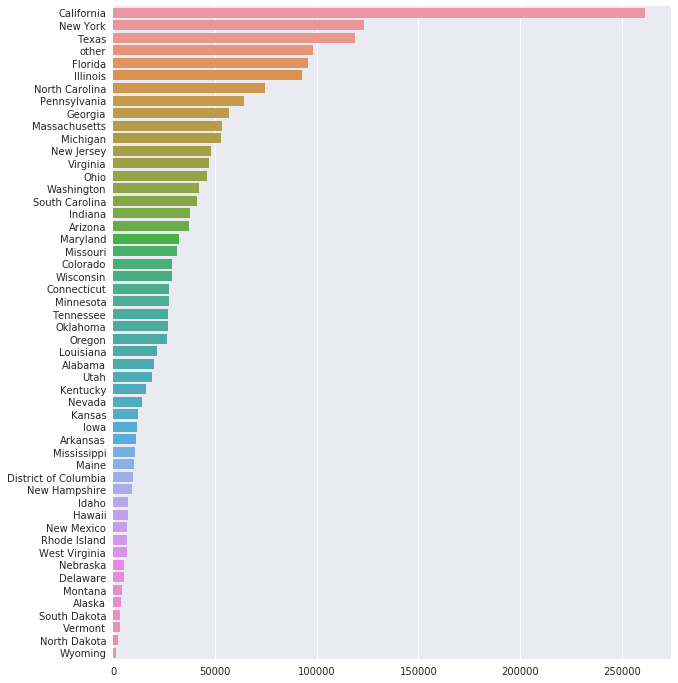

In [63]:
optional_yes = donations[donations['Donation Included Optional Donation'] == "Yes"].merge(donors,how='left',on='Donor ID')
data = optional_yes.groupby('Donor State')['Donor ID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,12))
sns.barplot(y='Donor State',x='Donor ID',data=data)
plt.xlabel("")
plt.ylabel("")

Now we are certain the distribution of donors with this option follows the general distribution.

## <a id='44'>4.4. Donation Amounts vs. Donor Is Teacher</a>

We turn to the identity of donors and see if a teacher would donate more than those who are not. In common sense we expect teachers to donate more due to reasons like empathy.

Text(0.5,1,'Mean')

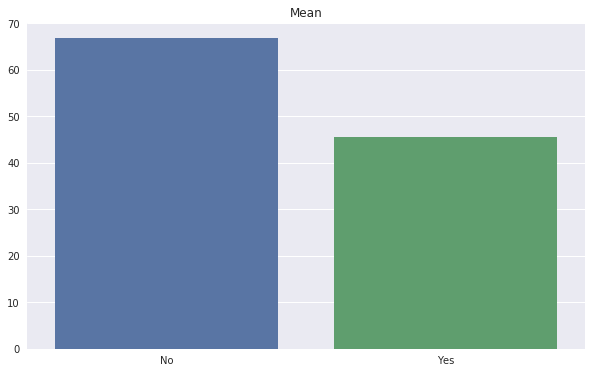

In [64]:
donation_donor = donations.merge(donors,how='left',on='Donor ID')
data = donation_donor.groupby('Donor Is Teacher')['Donation Amount'].agg(['mean']).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Donor Is Teacher',y='mean',data=data)
plt.ylabel("")
plt.xlabel("")
plt.title("Mean")

The result also contradicts our common sense, which is that teachers are willing to donate more, considering their positions.

## <a id='45'>4.5. Donation Amounts vs. School Metro Type</a>

many researches and news always tell us that schools at urban areas get more resources than rural areas. Now let's examine the truth.

Text(0.5,1,'Mean')

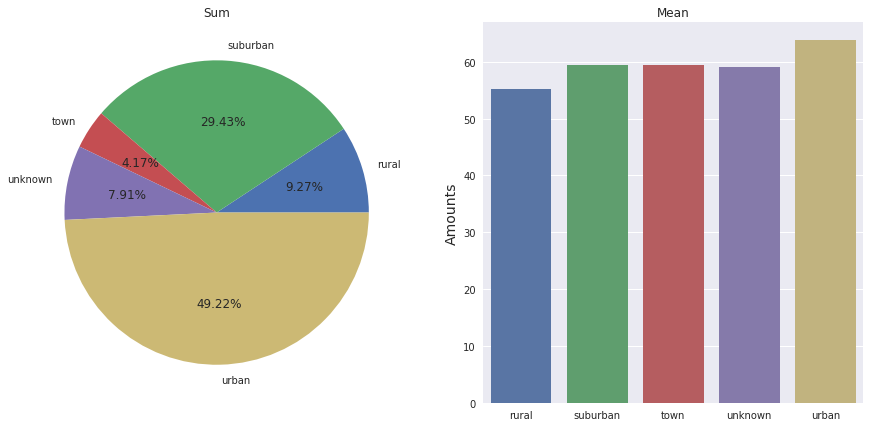

In [65]:
project_teacher = projects.merge(schools,how='left',on='School ID')
donation_teacher = donations.merge(project_teacher,how='left',on='Project ID')
data = donation_teacher.groupby('School Metro Type')['Donation Amount'].agg(['sum','mean']).reset_index()
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(121)
ax1 = data['sum'].plot(kind='pie',autopct='%.2f%%',labels=data['School Metro Type'],ax=ax1)
ax1.set_ylabel("")
ax1.set_xlabel("")
ax1.set_title("Sum")
ax2 = fig.add_subplot(122)
sns.barplot(x='School Metro Type',y='mean',data=data,ax=ax2)
ax2.set_ylabel("Amounts",fontsize=14)
ax2.set_xlabel("")
ax2.set_title("Mean")

It seems what we are told somewhat makes sense. The donations to urban schools account for almost 50% of total donations. But if we look at the average donation, urban schools only get a little bit more donations than schools at other areas.

## <a id='46'>4.6. Potential Once-Donation Donors</a>

For many NGOs like DonorsChoose.org, one goal is to attract more people as potential donors. If one is a donor already, then we expect he/she may be more willing to donate more. In this section we try to find out who are the potential donors that we can advertise.

First we try to find whether there is a pattern of donors who donate multiple times.

In [66]:
donation_donor = donations.merge(donors,how='left',on='Donor ID')
donate_counts = donation_donor['Donor ID'].value_counts()
donate_multiple = donate_counts[donate_counts > 1].index.values
donate_multiple = donation_donor[donation_donor['Donor ID'].isin(donate_multiple)]
donate_multiple.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57,West Jordan,Utah,No,840
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46,Riverton,Utah,No,840
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38,Salt Lake City,Utah,Yes,841
8,00000ce845c00cbf0686c992fc369df4,19351e1d9ae0bccab31b1f6009ad47a3,bd323208dc78b1c74b62664b768f3176,Yes,200.00,2,2013-02-17 21:36:24,Rochester,Michigan,No,559
9,00000ce845c00cbf0686c992fc369df4,d5364b1bb3b14594808bd6efa7544165,6dd6113f89f2766d3b0707ef2a46260c,Yes,10.00,44,2013-02-27 10:32:22,Inman,South Carolina,No,293


Let's analyze where these donors come from.

Text(0.5,0,'')

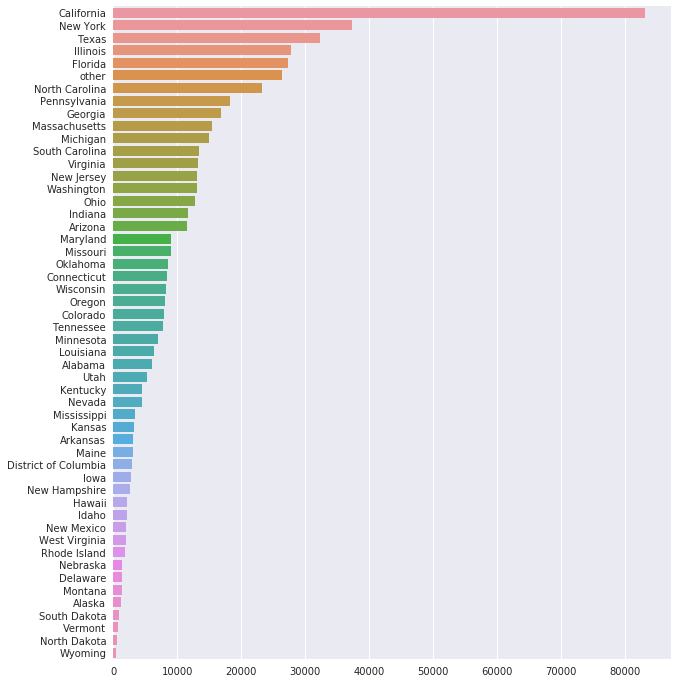

In [67]:
donate_multiple_loc = donate_multiple.groupby('Donor State')['Donor ID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,12))
sns.barplot(x='Donor ID',y='Donor State',data=donate_multiple_loc)
plt.ylabel("")
plt.xlabel("")

Unsurprisingly, this distribution is like overall donor distribution. So we have to turn to other directions. One possible direction is to look at the destination of donations and see whether they match with donor's location.

In [68]:
donate_multiple = donate_multiple.merge(projects,how='left',on='Project ID')
donate_multiple = donate_multiple.merge(schools,how='left',on='School ID')
in_state = donate_multiple[donate_multiple['Donor State'] == donate_multiple['School State']]
print("Number of in-state donations = {}".format(len(in_state)))
print("Number of donations = {}".format(len(donate_multiple)))

Number of in-state donations = 1997726
Number of donations = 3216271


Over 60% of donations whose donor donate multiple times are in-state donations. Let's plot the distribution among states.

Text(0.5,0,'')

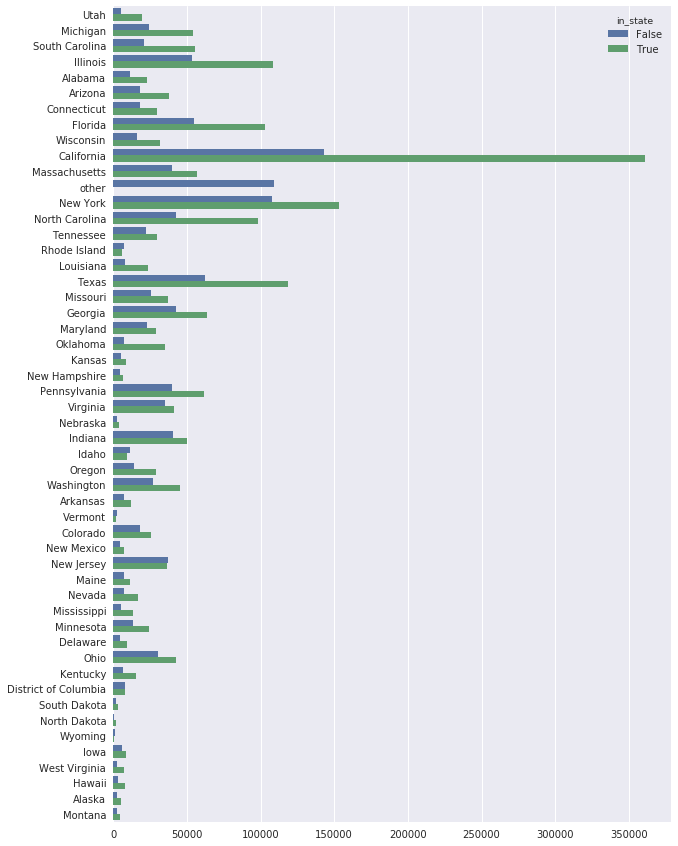

In [69]:
donate_multiple.loc[:,'in_state'] = (donate_multiple['Donor State'] == donate_multiple['School State'])
plt.figure(figsize=(10,15))
sns.countplot(y='Donor State',hue='in_state',data=donate_multiple)
plt.ylabel("")
plt.xlabel("")

We see that in most states donors tend to donate to in-state schools than out-state ones. Here comes a strategy to boost the donation: advertise in-state projects to existing donors.

According to the strategy, we can advertise in-state projects to donors in most states, except `Rhode Island`,`Idaho`,`Vermont`,`New Jersey`,`District of Columbia` and `Wyoming`. Let's find out these potential donors from donors who has donated only once.

In [70]:
donate_once = donate_counts[donate_counts == 1].index.values
donate_once = donation_donor[donation_donor['Donor ID'].isin(donate_once)]
exception_list = ["Rhode Island","Idaho","Vermont","New Jersey","District of Columbia","Wyoming"]
potential_advertisee = donate_once[~donate_once['Donor State'].isin(exception_list)]['Donor ID'].unique()
potential_advertisee[:10]

array(['4aaab6d244bf3599682239ed5591af8a',
       '377944ad61f72d800b25ec1862aec363',
       '896c75c9b8d9a91c759746e566cd3f37',
       '8a1875762c85932fff192ea126ccdff2',
       'a3f070e439d52de72ca62dc41f9b16a4',
       '391f14831940fc7bc41df2cd7fb06030',
       '531ed26f1a505282337e0d805be97281',
       '6243c0acf1dc9a4d71b1630411d3c41b',
       '28e3240a3a6714c41731725a1f199558',
       '279efa9df170502c80e2be9cc681cd45'], dtype=object)

We can target these donors and advertise more in-state projects to them.

## <a id='47'>4.7. Advertise to Frequent Donors</a>

In addition to appealing once-honors to donate again, another strategy is to target donors who have donated many times. Let's find them out first.

In [71]:
threshold = 10
donation_donor = donations.merge(donors,how='left',on='Donor ID')
frequent_donor = donation_donor['Donor ID'].value_counts().reset_index()
frequent_donor = frequent_donor[frequent_donor['Donor ID'] >= threshold]['index'].values
frequent_donor = donation_donor[donation_donor['Donor ID'].isin(frequent_donor)]
frequent_donor.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57,West Jordan,Utah,No,840
9,00000ce845c00cbf0686c992fc369df4,d5364b1bb3b14594808bd6efa7544165,6dd6113f89f2766d3b0707ef2a46260c,Yes,10.00,44,2013-02-27 10:32:22,Inman,South Carolina,No,293
24,00002eb25d60a09c318efbd0797bffb5,84e5d5d62368c36ee8252f60cb00f53a,309bbe105f70465277576733c0d451b3,No,10.00,43,2016-07-31 09:35:47,Grand Rapids,Michigan,No,495
25,00002eb25d60a09c318efbd0797bffb5,ba8b57316650c637d01896d11e70582d,da1487631dd320605c91825f24f48231,No,75.00,7,2016-05-21 21:25:00,NaN,Arizona,No,851
26,00002eb25d60a09c318efbd0797bffb5,f531537bafde0a45c4dfafbe17fa2dac,edef2c6422e4c82b8ae06466d4a7bbf9,Yes,595.28,36,2016-07-31 16:29:19,Greenwich,Connecticut,No,068


Once we find all projects whose donor have donated many times(here "many" means 10 times or more), we then try finding what kind of projects they donate most.

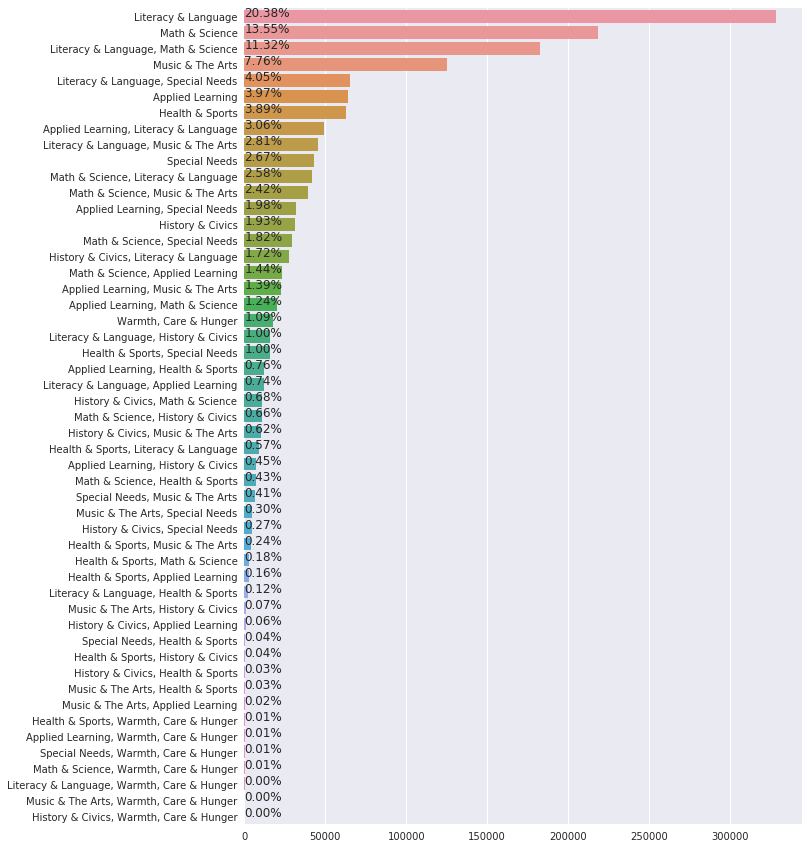

In [72]:
frequent_donor_projects = frequent_donor.merge(projects,how='left',on='Project ID')
categories = frequent_donor_projects["Project Subject Category Tree"].value_counts().sort_values(ascending=False).reset_index()
total = categories['Project Subject Category Tree'].sum()
plt.figure(figsize=(10,15))
sns.barplot(y='index',x='Project Subject Category Tree',data=categories)
plt.xlabel("")
plt.ylabel("")

for i,v in enumerate(categories['Project Subject Category Tree']):
    plt.text(0,i,"{:.2f}%".format(float(v)/total*100))

The distribution of main subject category is like the general distribution we studied earlier. This means we have to find other influential features.

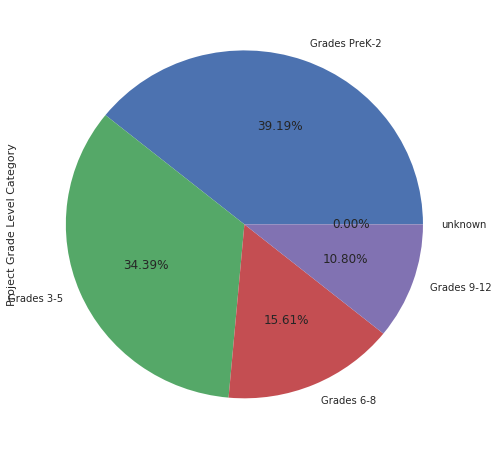

In [73]:
frequent_donor_projects['Project Grade Level Category'].value_counts().plot(kind='pie',autopct="%.2f%%",figsize=(8,8))

Again, is it similar to the overall distribution discussed before. Let's try "School Metro Type".

Text(0.5,1,'Overall')

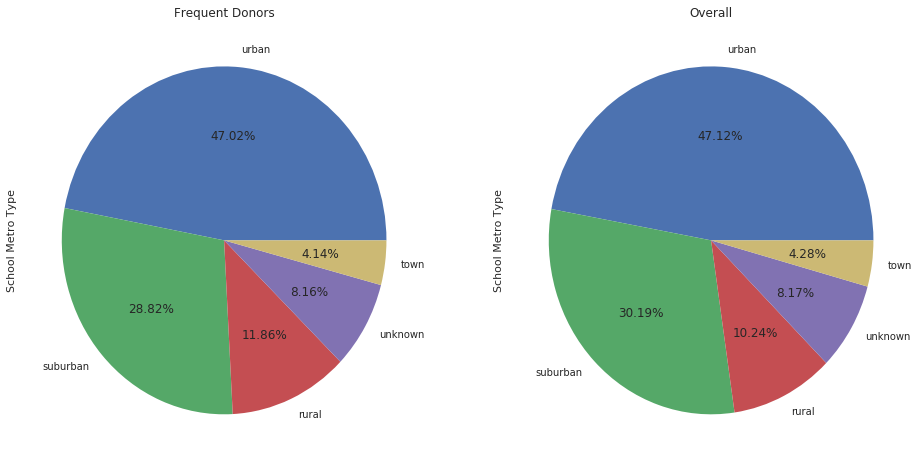

In [74]:
frequent_donor_projects_school = frequent_donor_projects.merge(schools,how='left',on='School ID')
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
frequent_donor_projects_school['School Metro Type'].value_counts().plot(kind='pie',autopct="%.2f%%",ax=ax1)
ax1.set_title("Frequent Donors")

overall = donations.merge(projects,how='left',on='Project ID')
overall = overall.merge(schools,how='left',on='School ID')
ax2 = fig.add_subplot(122)
overall['School Metro Type'].value_counts().plot(kind='pie',autopct="%.2f%%",ax=ax2)
ax2.set_title("Overall")

Until now, we've tried three features and none of them has significant effect on the distribution of frequent donors. There may exist hidden features that can influence the donation from frequent donors.

## <a id='48'>4.8. Projects to Recommend</a>

One of the goals of DonorsChoose.org is to help schools get donations as fast as possible. Here we try to recommend projects that are not fully funded yet, by the funding gap.

In [75]:
donations_by_project = donations.groupby("Project ID")["Donation Amount"].sum().reset_index()
projects_gap = projects[projects['Project Current Status'] == "Live"].merge(donations_by_project,how='left',on='Project ID')
projects_gap['Donation Amount'].fillna(0,inplace=True)
projects_gap.loc[:,"funding_gap"] = projects_gap['Project Cost'].subtract(projects_gap['Donation Amount'])
projects_gap.sort_values(by="funding_gap",ascending=False,inplace=True)
projects_gap.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date,Donation Amount,funding_gap
22422,b8743e15586241a71ed4708c5ca76eb3,10c395a77bbf199de76e76485f59815d,a58fa7379b85bb433fe59823b5ab8ef2,100,Teacher-Led,Java for Computer Scientists,My students are high schoolers with a love for...,My students are high schoolers with a love for...,My students need laptops for AP Computer Scien...,"Math & Science, Applied Learning","Applied Sciences, College & Career Prep",Grades 9-12,Computers & Tablets,66454.25,2018-04-09,2018-08-03,Live,NaN,0.0,66454.25
20426,3a1e9357a163fae01911b1628f4692fa,71955bc23a0ad104cab274ebefd261ca,119190f18375fddc6bfecfcca70a42bc,81,Teacher-Led,Classroom of the Future - Now!,My students are awesome and motivated learners...,My students are awesome and motivated learners...,"My students need need the KidsFit Treadmill, S...","Applied Learning, Health & Sports","Early Development, Health & Wellness",Grades 3-5,Books,44648.42,2018-04-09,2018-08-02,Live,NaN,0.0,44648.42
38479,5989dda0dc2258e8d70ba9653c2ec7e3,0059862631151cd960f49502cd5ed6ea,93cc803c26c91624ffff3be1e5c2b2be,4,Teacher-Led,Going Ham for Hamilton,MHJHS is a Title I school located in SE Atlant...,MHJHS is a Title I school located in SE Atlant...,My students need the exposure to a culturally ...,"History & Civics, Music & The Arts","History & Geography, Performing Arts",Grades 9-12,Trips,28344.24,2018-04-27,2018-05-21,Live,NaN,0.0,28344.24
429,f664a4b580615ec134362beea4a7db81,46ee1f137f890becaaabb58be8c4092b,4c1e05ac9eac544dc3fc2045a95b1efb,84,Teacher-Led,We Want to Start a Ruckus!,My students come from various backgrounds. The...,My students come from various backgrounds. The...,My students need new classroom furniture that ...,"Math & Science, Music & The Arts","Applied Sciences, Visual Arts",Grades 6-8,Flexible Seating,27972.85,2018-03-28,2018-07-28,Live,NaN,1.0,27971.85
32252,32f81e7617aeda8bddeb6db9c3979f43,071dc5095bef715fbd5282246b20c2c6,2bf648f3f6f761785408b12a6df58634,3,Teacher-Led,Technology Request From Future Digital Artists...,My students are mainly from low-income familie...,My students are mainly from low-income familie...,My students need computers that can handle gra...,"Applied Learning, Music & The Arts","College & Career Prep, Visual Arts",Grades 9-12,Computers & Tablets,24961.42,2018-04-18,2018-08-05,Live,NaN,0.0,24961.42


The above are top 5 projects that have largest funding gap.